# Introduction

Members:

- Ardiansyah Putra Mahadika

- Divani Rafitya Amanda

- Salman Hamka De Qais

Batch : BSD - 006

## Background

In these days, people have many investment options like stocks, bonds, and mutual funds. With so many choices, it can be confusing to decide where to invest. This confusion can lead to poor investment decisions that don't meet long-term financial goals. That's why a personal finance recommendation system is important. It can help by giving personalized advice based on a person's financial data, risk tolerance, and goals, making it easier to make smart and informed investment choices.

## Objective

__1. Understanding the Investment Behavior of Respondents (Young Millennials) Using the 5W1H Approach__


- Who: Identify who the respondents are (young millennials).
- What: Understand what types of investments they prefer.
- When: Determine when they are most likely to invest.
- Where: Identify the geographical locations or platforms they prefer for investments.
- Why: Understand the reasons behind their investment choices.
- How: Examine how they make investment decisions and the factors influencing these decisions.


__2. Exploratory Data Analysis (EDA)__

*Before Clustering:*

- Demographic Analysis: Analyze the demographic distribution of the respondents (age, gender, income, etc.)

- Investment Preferences: Examine the types of investments preferred by the respondents

- Risk Tolerance: Analyze the risk tolerance levels of the respondents

*After Clustering:*

- Cluster Characteristics: Analyze the characteristics of each cluster (demographics, investment preferences, risk tolerance)

- Risk Profiles: Examine the risk profiles of each cluster

- Investment Behavior: Analyze the investment behaviors of each cluster


__3. Identifying Respondent Groupings Based on Characteristics and Risk Profiles__

- Principal Component Analysis (PCA): Use PCA to reduce dimensionality while retaining important information.

- Elbow Method: Use the Elbow Method to determine the optimal number of clusters.

- Silhouette Score and Silhouette Plot: Use the Silhouette Score and Silhouette Plot to validate the optimal number of clusters.


__4. Creating a Machine Learning Model for Investment Product Recommendations__

- Artificial Neural Network (ANN): Develop an ANN model to provide investment product recommendations according to the risk profile of each cluster/group.

- Natural Language Processing (NLP): Use NLP to analyze text data and generate the best investment recommendations based on the analyzed data.

# Import Libraries

In [1]:
# Data loading libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering and Text Preprocessing Libraries
import phik
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Modeling Libraries
import tensorflow as tf
import tensorflow_hub as tf_hub
import pydot
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense,Flatten, Dropout, BatchNormalization, Activation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Saving 
import pickle
import json

# import warnings
import warnings
warnings.filterwarnings('ignore')

# Data Loading

In [2]:
# loading data from .csv file
df = pd.read_csv('survey_cleaned_data.csv')
df.head()

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,3
1,1,1,0,2,2,4,3,3,3,3,...,4,2,3,2,3,4,3,2,2,3
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,0,2,1,3,2,3,3,4,...,3,2,2,1,1,2,3,3,2,3
4,0,0,1,2,2,3,2,3,2,5,...,2,1,1,2,2,1,1,2,1,3


In [3]:
# show columns name
df.columns

Index(['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27',
       'q28', 'q29', 'q30'],
      dtype='object')

## Data Explanation

| Column | Description | Datatype | Is Correct Datatype |
| :---------------------: | :---------------------------------: | :----------------------------: | :------------: |
| gender | 0 = Female; 1 = male	 | int64 | Yes | 
| age | 0 = 17-20 years old; 1 = 21-25 years old; 2 = 26-30 years old | int64 | Yes | 
| allowance | 0 = < 500k; 1 = 500-1000k; 2 = > 1000k	 | int64 | Yes | 
| q1 | I have better understanding of how to invest my money | int64 | Yes | 
| q2 | I have better understanding of how to manage my credit use | int64 | Yes | 
| q3 | I have the ability to maintain financial records for my income and expenditure | int64 | Yes | 
| q4 | I can manage my money easily | int64 | Yes | 
| q5 | I have better understanding of financial instruments (e.g. Bonds, stock, T-bill, time value of money, future contract, option and ets)	 | int64 | Yes | 
| q6 | I have the ability to prepare my own budget weekly and monthly | int64 | Yes | 
| q7 | I don’t save, because I think it is too hard | int64 | Yes | 
| q8 | I enjoy spending money on things that aren't practical	 | int64 | Yes | 
| q9 | When I get money, I always spend it immediately (within 1 or 2 days) | int64 | Yes | 
| q10 | I see it, I like it, I buy it's describe me	 | int64 | Yes | 
| q11 | 'Just do it' describes the way I buy things | int64 | Yes | 
| q12 | ‘buy now, think about it later’ describe me | int64 | Yes | 
| q13 | I always failed to control myself from spending money | int64 | Yes | 
| q14 | I am more concerned with what happens to me in short run than in long run | int64 | Yes | 
| q15 | When I set having goals for myself, I rarely achieve them. | int64 | Yes | 
| q16 | As far I know, some of my friends regularly do save with a saving account | int64 | Yes | 
| q17 | I always discuss financial management issue (saving) with my friends | int64 | Yes | 
| q18 | I always discuss financial management issue (investment) with my friends | int64 | Yes | 
| q19 | I always spend my leisure time with my friends | int64 | Yes | 
| q20 | I always involve in money spending activities with my friends | int64 | Yes | 
| q21 | I always follow the information about investment growth | int64 | Yes | 
| q22 | I put money aside on a regular basis for the future | int64 | Yes | 
| q23 | In order to invest, I often compare prices before I make purchase | int64 | Yes | 
| q24 | In order to invest, I often consider whether the stock prices are valuable when I sell it | int64 | Yes | 
| q25 | In order to invest, I often understanding the fundamental analysis | int64 | Yes | 
| q26 | I always have money available in the event of my failed investment | int64 | Yes | 
| q27 | In rder to invest, I plan to manage my expenses | int64 | Yes | 
| q28 | I save my money in order to do investment | int64 | Yes | 
| q29 | I invest to achieve certain goals | int64 | Yes | 
| q30 |  I have some investment account in money market and also capital market | int64 | Yes | 

___


| Note for Questionnaire Code: | 
| :---------------------: |
| 1 = Disagree |
| 2 = Agree |
| 3 = Neutral |
| 4 = Strongly Agree |
| 5 = Very Strongly Agree |

In [4]:
data_inf = {
    "gender": ["Male"],
    "age": [20],
    "allowance": [800000],
    "q1": ["Agree"],
    "q2": ["Strongly Agree"],
    "q3": ["Neutral"],
    "q4": ["Agree"],
    "q5": ["Neutral"],
    "q6": ["Agree"],
    "q7": ["Very Strongly Agree"],
    "q8": [""],
    "q9": [5],
    "q10": [5],
    "q11": [2],
    "q12": [5],
    "q13": [1],
    "q14": [3],
    "q15": [2],
    "q16": [3],
    "q17": [2],
    "q18": [1],
    "q19": [3],
    "q20": [4],
    "q21": [2],
    "q22": [1],
    "q23": [2],
    "q24": [4],
    "q25": [2],
    "q26": [3],
    "q27": [2],
    "q28": [4],
    "q29": [4],
    "q30": [5]
}

In [5]:
# show dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   gender     263 non-null    int64
 1   age        263 non-null    int64
 2   allowance  263 non-null    int64
 3   q1         263 non-null    int64
 4   q2         263 non-null    int64
 5   q3         263 non-null    int64
 6   q4         263 non-null    int64
 7   q5         263 non-null    int64
 8   q6         263 non-null    int64
 9   q7         263 non-null    int64
 10  q8         263 non-null    int64
 11  q9         263 non-null    int64
 12  q10        263 non-null    int64
 13  q11        263 non-null    int64
 14  q12        263 non-null    int64
 15  q13        263 non-null    int64
 16  q14        263 non-null    int64
 17  q15        263 non-null    int64
 18  q16        263 non-null    int64
 19  q17        263 non-null    int64
 20  q18        263 non-null    int64
 21  q19        263 n

# Exploratory Data Analysis

## Objective 1: Gender Distribution

In [6]:
# create gender to dataframe
df_gender_based = df['gender'].value_counts()
df_gender_based

gender
0    185
1     78
Name: count, dtype: int64

In [7]:
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,...,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,4,3,3,3,3,3,4,...,3,3,3,3,3,3,3,3,3,3
1,1,1,0,2,2,4,3,3,3,3,...,4,2,3,2,3,4,3,2,2,3
2,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,0,2,1,3,2,3,3,4,...,3,2,2,1,1,2,3,3,2,3
4,0,0,1,2,2,3,2,3,2,5,...,2,1,1,2,2,1,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,...,5,4,5,5,5,3,5,5,4,3
259,0,0,0,2,2,4,4,3,3,4,...,1,2,1,1,1,1,1,1,1,1
260,0,1,2,2,3,3,3,3,4,3,...,2,2,1,1,2,1,1,1,1,4
261,0,1,2,4,3,2,3,5,4,4,...,2,3,4,4,4,3,4,3,2,1


In [8]:
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
corr_df = pd.DataFrame(correlation_matrix)
pd.set_option('display.max_columns', None)
corr_df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
gender,1.000000,0.054729,-0.049190,0.009169,0.004252,0.158599,-0.026996,-0.009866,0.098192,-0.085941,-0.067212,-0.083409,0.008262,-0.026332,-0.006539,-0.050307,-0.062590,-0.110494,-0.014847,-0.038168,0.012409,-0.165532,0.000603,0.006381,0.023022,0.060010,0.027421,0.060224,0.120055,0.065713,0.055258,-0.044748,0.000661
age,0.054729,1.000000,0.139898,-0.106273,-0.000459,-0.025301,-0.015002,-0.110002,0.040831,-0.082240,-0.027632,-0.072755,0.005747,-0.037867,-0.024865,-0.027955,-0.036642,0.020959,0.003832,-0.112760,-0.113857,-0.004597,-0.021658,-0.036219,0.038991,0.155795,0.032884,0.035174,0.052164,0.098051,0.103121,-0.021608,-0.076546
allowance,-0.049190,0.139898,1.000000,0.042549,0.027537,0.028442,0.007700,0.025019,0.004803,-0.054539,-0.101890,-0.087949,-0.086070,-0.064519,-0.063357,-0.023825,-0.081944,0.039028,0.086430,0.039650,0.070399,0.109415,0.031123,0.072212,-0.012218,0.072163,0.070013,0.118688,0.017252,0.103063,0.076558,0.035852,-0.057399
q1,0.009169,-0.106273,0.042549,1.000000,0.385832,0.349858,0.364950,0.548741,0.384598,-0.029381,-0.031099,0.017708,-0.026075,-0.067692,0.016411,0.056156,-0.044043,0.059666,0.331194,0.222018,0.358854,0.103643,0.139783,0.406389,0.328535,0.131321,0.194052,0.178907,0.246501,0.193787,0.211129,0.288979,0.260883
q2,0.004252,-0.000459,0.027537,0.385832,1.000000,0.628716,0.765575,0.170107,0.682333,-0.450970,-0.482645,-0.524588,-0.328322,-0.390066,-0.409659,-0.389771,-0.443309,-0.037559,0.501983,0.125623,0.092847,0.180854,-0.080628,0.252108,0.620523,0.620968,0.630936,0.645082,0.539378,0.607479,0.576812,0.539656,-0.181238
q3,0.158599,-0.025301,0.028442,0.349858,0.628716,1.000000,0.649584,0.234849,0.672097,-0.252827,-0.337386,-0.362208,-0.182117,-0.227288,-0.272742,-0.257692,-0.276617,0.020344,0.462236,0.181985,0.245182,0.105604,0.021856,0.279786,0.447441,0.389215,0.432975,0.489478,0.401296,0.417039,0.446995,0.397538,-0.087518
q4,-0.026996,-0.015002,0.007700,0.364950,0.765575,0.649584,1.000000,0.215802,0.692116,-0.374153,-0.418137,-0.417667,-0.206620,-0.313690,-0.311276,-0.326549,-0.365675,-0.026846,0.462963,0.122758,0.160665,0.183169,-0.006560,0.275316,0.544253,0.547398,0.544629,0.600983,0.509137,0.551286,0.528480,0.500434,-0.128205
q5,-0.009866,-0.110002,0.025019,0.548741,0.170107,0.234849,0.215802,1.000000,0.311138,0.027028,-0.021741,0.040820,0.027545,0.013991,0.002326,0.002023,0.058126,0.147549,0.278348,0.237072,0.378125,0.135491,0.180771,0.450975,0.170050,0.010007,0.081145,0.084922,0.130641,0.105484,0.101463,0.149562,0.309218
q6,0.098192,0.040831,0.004803,0.384598,0.682333,0.672097,0.692116,0.311138,1.000000,-0.279120,-0.414366,-0.419982,-0.236630,-0.340538,-0.329092,-0.348972,-0.354624,-0.027233,0.379754,0.151387,0.196536,0.138045,0.037629,0.321911,0.521387,0.525173,0.495860,0.564395,0.468063,0.529333,0.477660,0.393098,-0.061027
q7,-0.085941,-0.082240,-0.054539,-0.029381,-0.450970,-0.252827,-0.374153,0.027028,-0.279120,1.000000,0.599191,0.630321,0.417941,0.520454,0.433503,0.471045,0.504136,0.170356,-0.272234,0.103873,0.067752,-0.012744,0.222918,-0.093590,-0.469458,-0.432779,-0.448573,-0.398219,-0.417790,-0.427513,-0.454775,-0.441404,0.239343


In [9]:
financial_literacy = [np.mean([3.29, 4.02, 3.67, 3.91, 3.13, 3.78]), #for cluster 0
                      np.mean([2.81, 1.80, 2.29, 2.20, 2.92, 2.18]), #for cluster 1
                      np.mean([2.79, 2.46, 2.74, 2.61, 2.85, 2.61])] #for cluster 2

self_control = [np.mean([2.36, 2.27, 2.13, 2.27, 2.29, 2.09, 2.62, 2.33, 3.09]), #for cluster 0
                np.mean([4.22, 4.47, 4.71, 4.09, 4.06, 4.24, 3.87, 4.04, 3.42]), #for cluster 1
                np.mean([3.27, 3.42, 3.61, 2.89, 3.09, 2.99, 2.71, 2.79, 2.38])] #for cluster 2

peer_influence = [np.mean([3.60, 2.91, 3.04, 3.18, 2.91, 3.44]), #for cluster 0
                  np.mean([2.40, 2.99, 3.06, 2.60, 3.36, 2.78]), #for cluster 1
                  np.mean([2.57, 2.94, 2.88, 2.55, 2.74, 2.69])] #for cluster 2

investment_behavior = [np.mean([3.89, 4.44, 4.51, 4.27, 3.76, 4.04, 4.02, 3.98, 2.62]), #for cluster 0
                       np.mean([1.97, 1.55, 1.49, 1.77, 2.06, 1.83, 1.93, 1.98, 3.59]), #for cluster 1
                       np.mean([2.61, 2.06, 2.07, 2.24, 2.51, 2.27, 2.36, 2.39, 3.28])] #for cluster 2

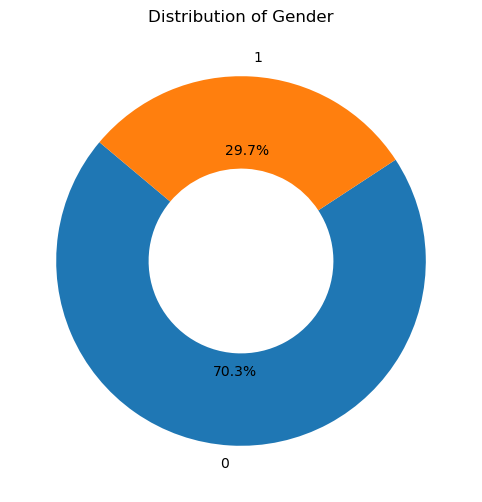

In [10]:
# visualization with pie chart
plt.figure(figsize=(8, 6))
plt.pie(df_gender_based, labels=df_gender_based.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.5})
plt.title('Distribution of Gender')
plt.show()

The data analysis revealed a significant gender imbalance in the research sample, with a predominance of males, indicating potential gender bias. This imbalance needs further investigation to understand its causes and implications for the research findings. Addressing gender representation is crucial, as such bias can limit the generalizability of results and overlook minority perspectives. Future studies should aim for more balanced gender representation and consider social and cultural factors affecting female participation.

## Objective 2: Age Distribution

In [11]:
# create age to dataframe
df_age_based = df['age'].value_counts().reset_index()
df_age_based = pd.DataFrame({'age':['17-20 years old', '21-25 years old', '26-30 years old'], 'val':[10, 30, 20]})
df_age_based

,age,val
0,17-20 years old,10
1,21-25 years old,30
2,26-30 years old,20


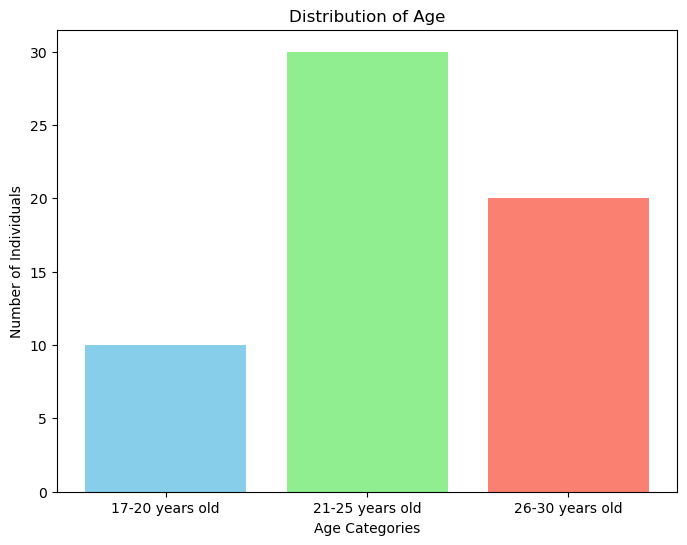

In [12]:
# visualization with bar chart
plt.figure(figsize=(8, 6))
plt.bar(df_age_based['age'], df_age_based['val'], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Age Categories')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Age')
plt.show()

The analysis reveals a significant increase in average values for the 21-25 age group, suggesting specific factors or conditions that favor this group. In contrast, there is a decline in average values for the 26-30 age group after the peak observed in the 21-25 age group, which may indicate shifts in priorities, job demands, or other influencing factors. Additionally, the graph highlights a substantial difference in average values across the three age groups, indicating that age is a significant factor affecting the measured values.

## Objective 3: Allowance Distribution

In [13]:
# create allowance to dataframe
df_allowance_based = df['allowance'].value_counts().reset_index()
df_allowance_based = pd.DataFrame({'allowance':['< 500k', '500-1000k', '> 1000k'], 'val':[10, 30, 20]})
df_allowance_based

,allowance,val
0,< 500k,10
1,500-1000k,30
2,> 1000k,20


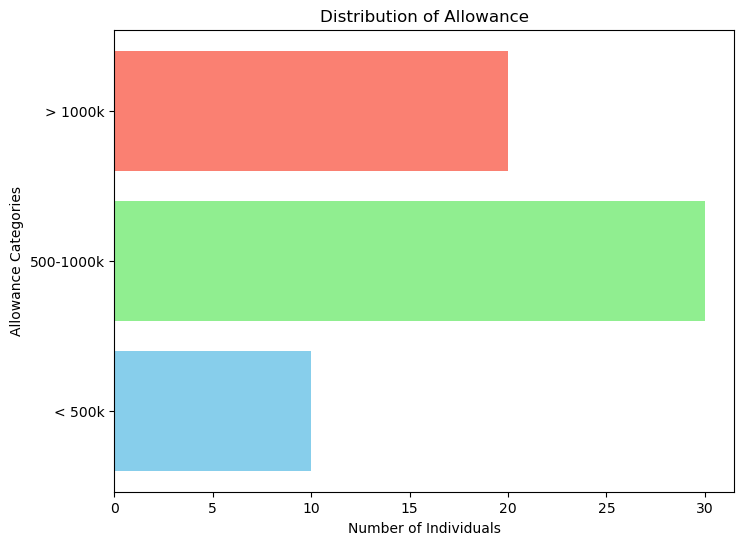

In [14]:
# visualization with bar chart
plt.figure(figsize=(8, 6))
plt.barh(df_allowance_based['allowance'], df_allowance_based['val'], color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Number of Individuals')
plt.ylabel('Allowance Categories')
plt.title('Distribution of Allowance')
plt.show()

The horizontal bar chart visually depicts the distribution of pocket money across three categories: under 500k IDR, between 500k and 1 million IDR, and over 1 million IDR. The X-axis represents the frequency or number of individuals in each category, with the bar length indicating the proportion of individuals receiving each amount. The chart reveals that most surveyed individuals fall into the 500k to 1 million IDR range, as shown by the longest bar. Fewer individuals receive more than 1 million IDR, and the category under 500k IDR has the lowest frequency, indicating it is the least common amount among the surveyed individuals.

## Objective 4: Allowance Based on Investment Understanding

In [15]:
# allowance based on question 1
allowance_q1 = df.groupby('allowance')['q1'].sum().reset_index()
allowance_q1

,allowance,q1
0,0,446
1,1,242
2,2,71


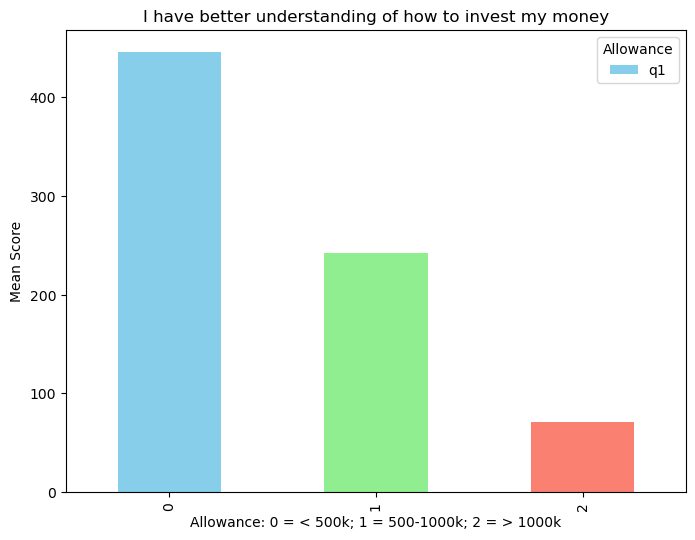

In [16]:
# visualization with bar chart for question 1 based on allowance using mean
plt.figure(figsize=(8, 6))
allowance_q1['q1'].plot(kind='bar',color=['skyblue', 'lightgreen', 'salmon'])
plt.title('I have better understanding of how to invest my money')
plt.xlabel('Allowance: 0 = < 500k; 1 = 500-1000k; 2 = > 1000k')
plt.ylabel('Mean Score')
plt.legend(title='Allowance')
plt.show()

The bar plot reveals that respondents with an allowance over 1 million IDR (category 2) have the highest average score for understanding investment, around 3. Those with allowances between 500k and 1 million IDR (category 1) have similar scores, while respondents with less than 500k IDR (category 0) score slightly lower. This indicates a positive link between allowance size and investment understanding, suggesting that higher allowances may provide better access to resources or education. However, the small score differences also suggest that other factors like education and personal experience play a role in investment knowledge.

## Objective 5: Allowance Based on Financial Management

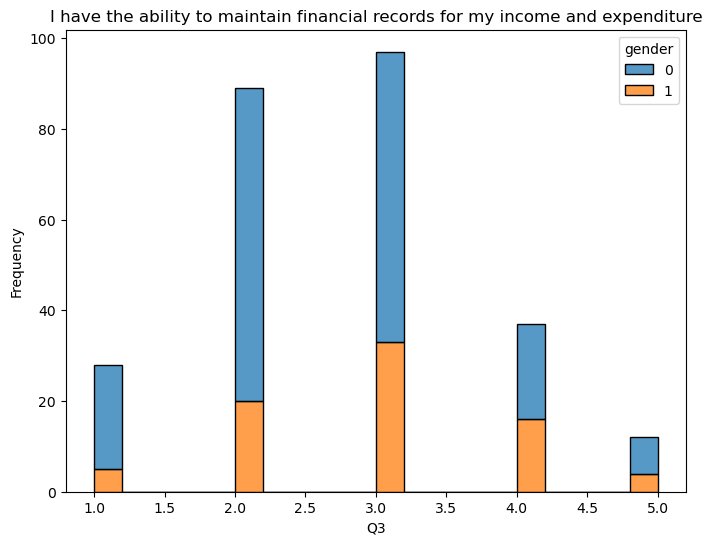

In [17]:
# visualization with bar chart for question 3 based on gender
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='q3', hue='gender', multiple='stack', bins=20)
plt.title('I have the ability to maintain financial records for my income and expenditure')
plt.xlabel('Q3')
plt.ylabel('Frequency')
plt.show()

The analysis reveals that females are more prevalent across all response scales, particularly on scales 2 and 3, indicating uncertainty or neutrality about their financial record-keeping abilities. In contrast, males, though fewer in number, are more evenly distributed across higher scales (3 and 4), suggesting greater confidence in their financial management skills. This suggests a need for financial literacy programs and interventions focused on women to boost their confidence and skills in managing finances. Males appear more confident despite their lower representation, highlighting the importance of targeted educational efforts to address these gaps.

## Objective 6: Allowance Based on Financial Bugeting

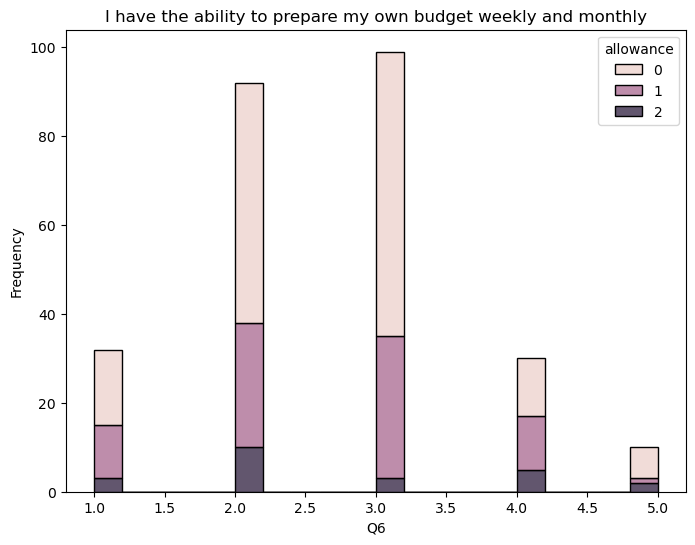

In [18]:
# visualization with bar chart for question 3 based on allowance
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='q6', hue='allowance', multiple='stack', bins=20)
plt.title('I have the ability to prepare my own budget weekly and monthly')
plt.xlabel('Q6')
plt.ylabel('Frequency')
plt.show()

The plot illustrates the distribution of responses to question Q6 about budgeting abilities. Different colors represent allowance categories: light brown for <500k, light purple for 500-1000k, and dark purple for >1000k. Most responses fall on ratings 2 and 3, indicating that many respondents feel neutral or slightly agree about their budgeting skills. Respondents with allowances under 500k show varied but generally neutral perceptions. Those with allowances between 500k and 1 million exhibit more balanced perceptions across ratings 2, 3, and 4, while those with allowances over 1 million tend to be more confident, though some still disagree. Overall, higher allowances correlate with greater confidence in budgeting abilities.

## Objective 7: Overall Insight for Financial Literacy

In [19]:
# Get the value counts for each question
value_counts_q1 = df['q1'].value_counts().sort_index()
value_counts_q2 = df['q2'].value_counts().sort_index()
value_counts_q3 = df['q3'].value_counts().sort_index()
value_counts_q4 = df['q4'].value_counts().sort_index()
value_counts_q5 = df['q5'].value_counts().sort_index()
value_counts_q6 = df['q6'].value_counts().sort_index()

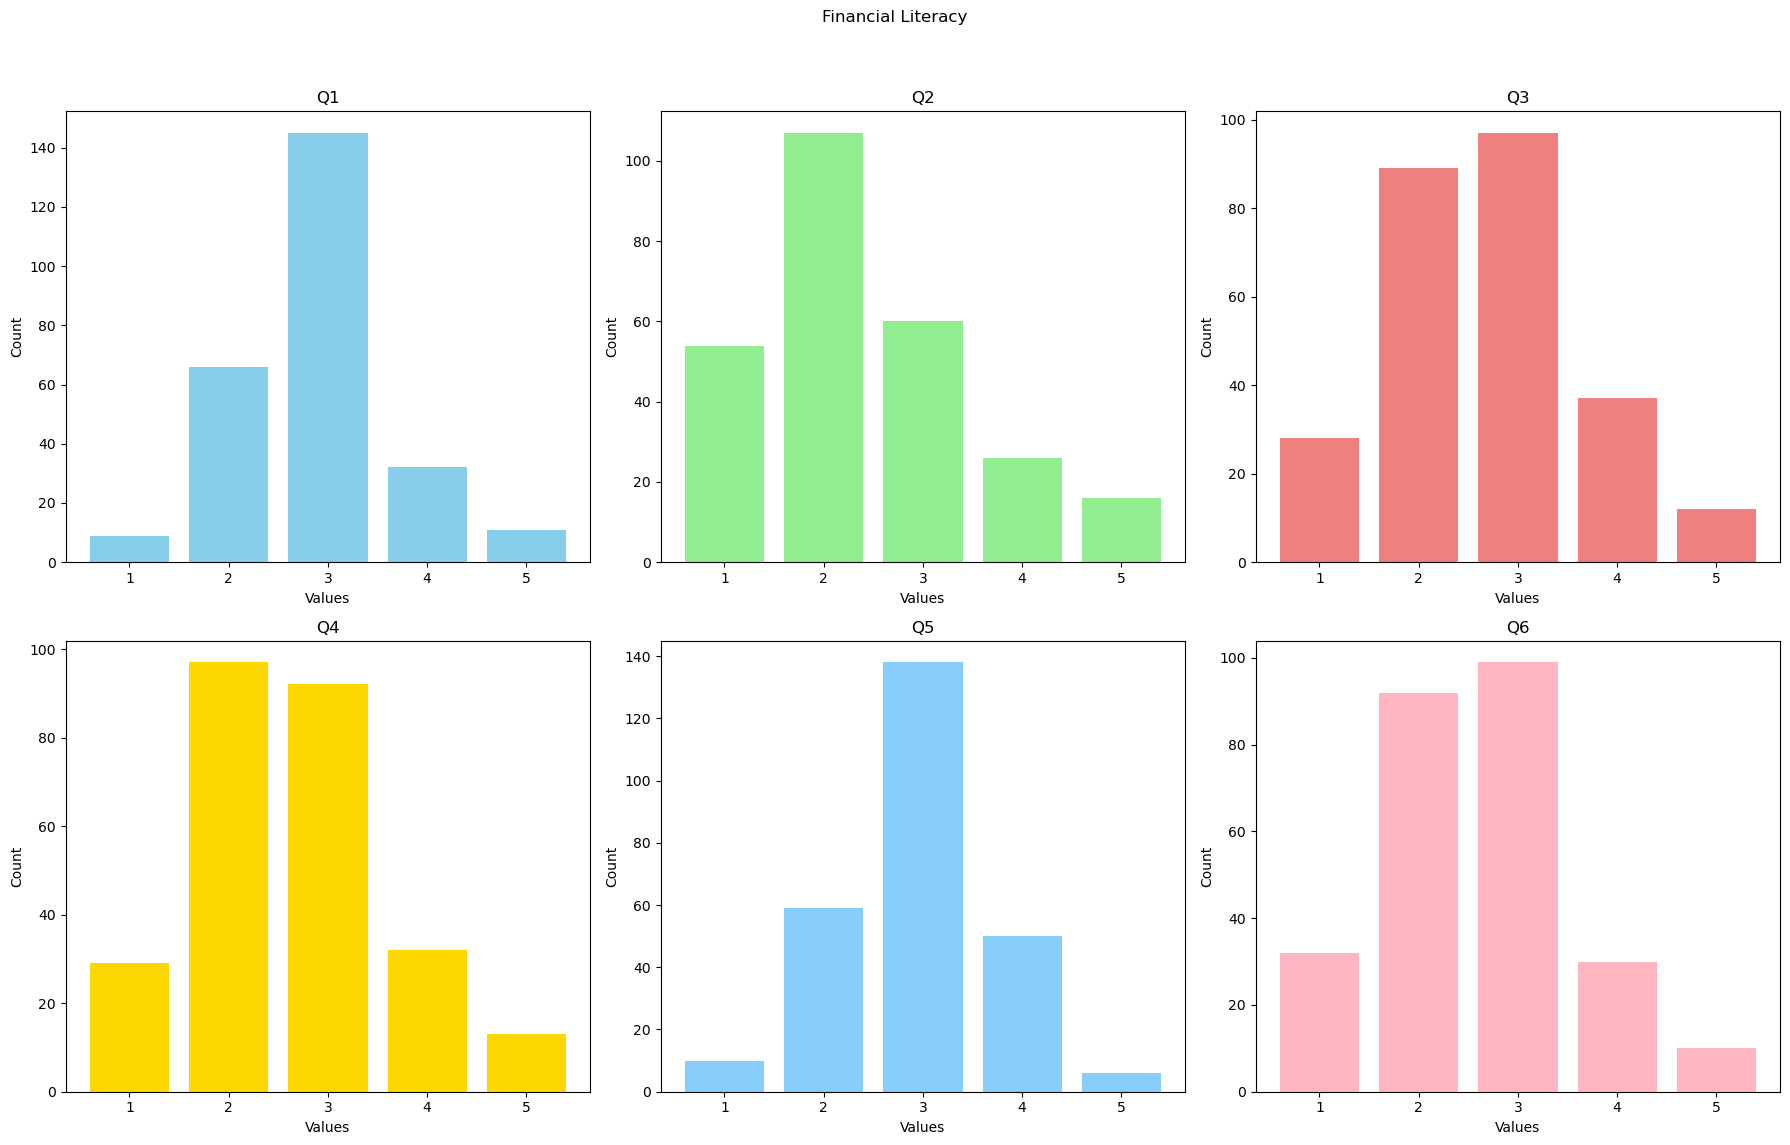

In [20]:
# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Financial Literacy')

# Plot each question's value counts
axs[0, 0].bar(value_counts_q1.index, value_counts_q1.values, color='skyblue')
axs[0, 0].set_title('Q1')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Count')

axs[0, 1].bar(value_counts_q2.index, value_counts_q2.values, color='lightgreen')
axs[0, 1].set_title('Q2')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Count')

axs[0, 2].bar(value_counts_q3.index, value_counts_q3.values, color='lightcoral')
axs[0, 2].set_title('Q3')
axs[0, 2].set_xlabel('Values')
axs[0, 2].set_ylabel('Count')

axs[1, 0].bar(value_counts_q4.index, value_counts_q4.values, color='gold')
axs[1, 0].set_title('Q4')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Count')

axs[1, 1].bar(value_counts_q5.index, value_counts_q5.values, color='lightskyblue')
axs[1, 1].set_title('Q5')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Count')

axs[1, 2].bar(value_counts_q6.index, value_counts_q6.values, color='lightpink')
axs[1, 2].set_title('Q6')
axs[1, 2].set_xlabel('Values')
axs[1, 2].set_ylabel('Count')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plot shows six histograms representing respondent answers to questions Q1 through Q6 on financial literacy. Each histogram has an X-axis for answer values (1 to 5) and a Y-axis for the number of respondents choosing each value. Most responses are centered around values 2 and 3, with peaks at 3 for Q1 and Q5, and at 2 for Q2, Q3, Q4, and Q6. This indicates a moderate viewpoint among respondents, with some questions showing more spread but overall, answers are concentrated around the middle values or neutral.

## Objective 8: Overall Insight for Self Control

In [21]:
# Get the value counts for each question
value_counts_q7 = df['q7'].value_counts().sort_index()
value_counts_q8 = df['q8'].value_counts().sort_index()
value_counts_q9 = df['q9'].value_counts().sort_index()
value_counts_q10 = df['q10'].value_counts().sort_index()
value_counts_q11 = df['q11'].value_counts().sort_index()
value_counts_q12 = df['q12'].value_counts().sort_index()
value_counts_q13 = df['q13'].value_counts().sort_index()
value_counts_q14 = df['q14'].value_counts().sort_index()
value_counts_q15 = df['q15'].value_counts().sort_index()

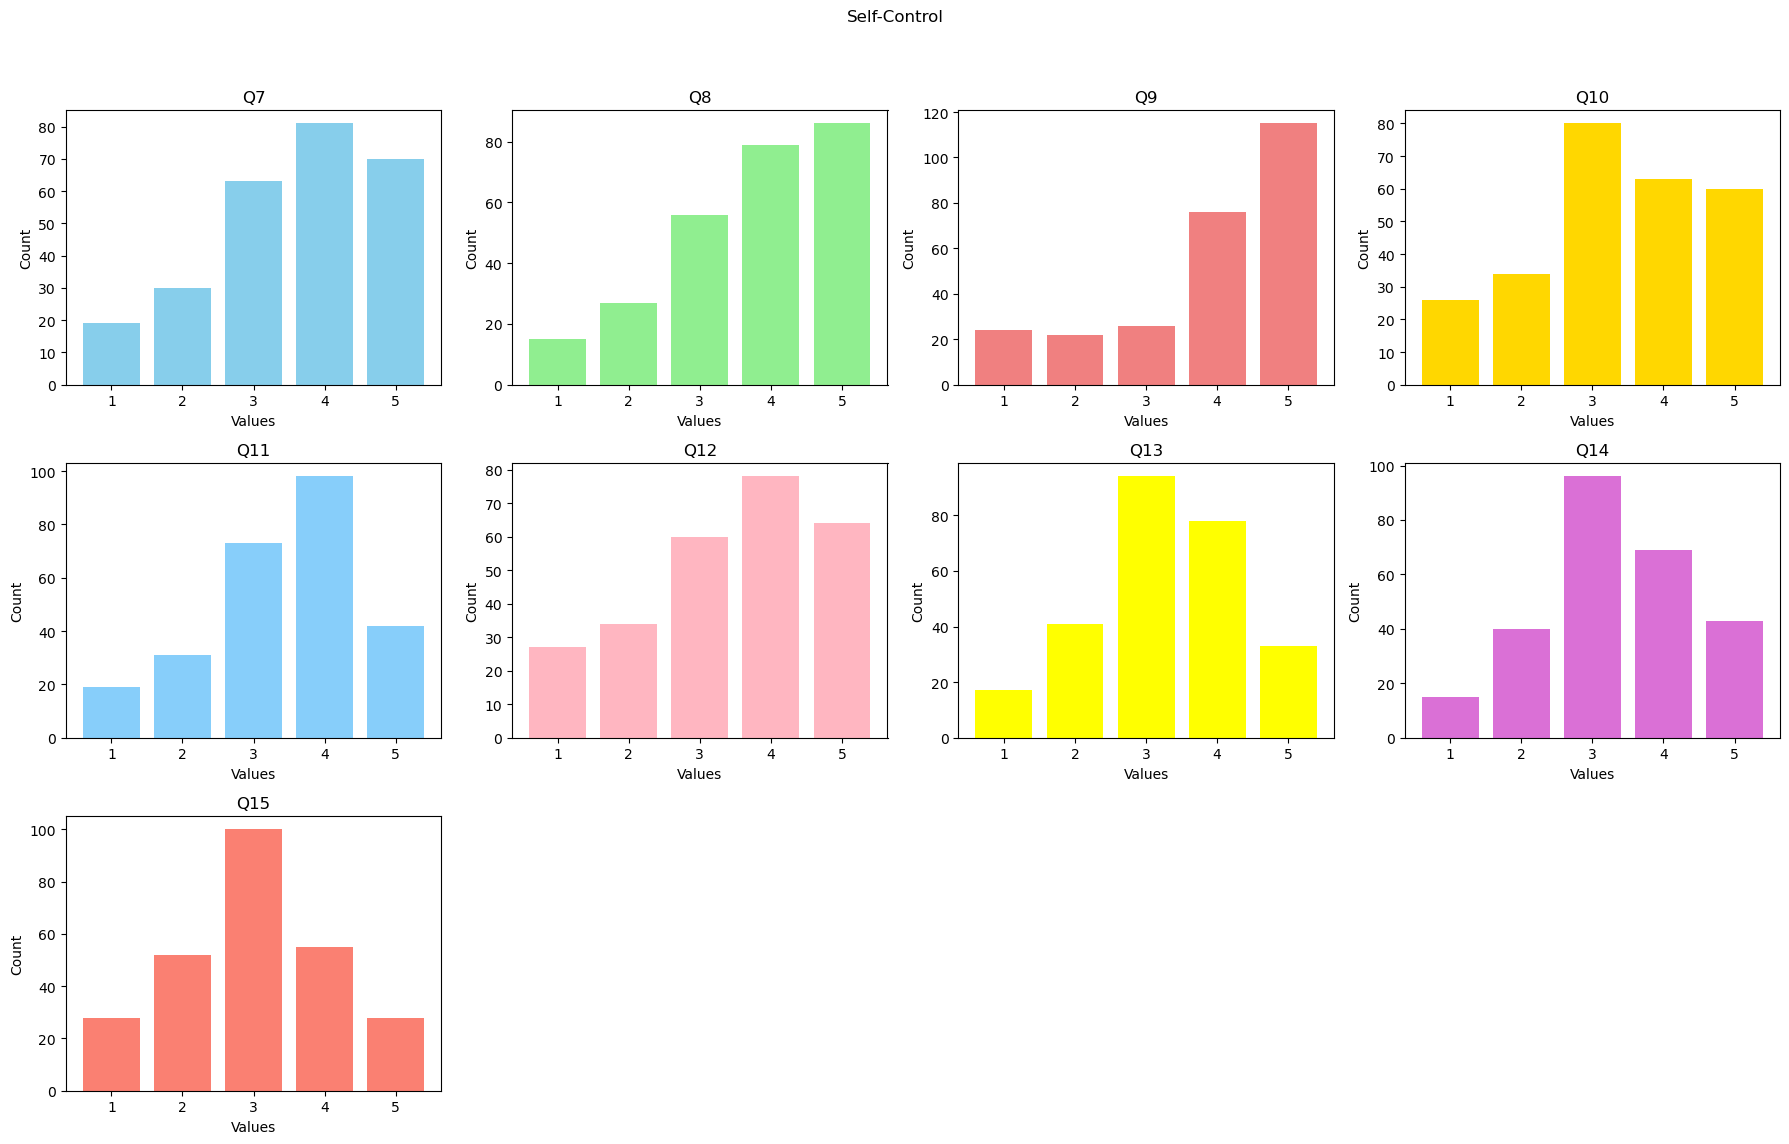

In [22]:
# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Self-Control')

# Plot each question's value counts with different colors
axs[0, 0].bar(value_counts_q7.index, value_counts_q7.values, color='skyblue')
axs[0, 0].set_title('Q7')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Count')

axs[0, 1].bar(value_counts_q8.index, value_counts_q8.values, color='lightgreen')
axs[0, 1].set_title('Q8')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Count')

axs[0, 2].bar(value_counts_q9.index, value_counts_q9.values, color='lightcoral')
axs[0, 2].set_title('Q9')
axs[0, 2].set_xlabel('Values')
axs[0, 2].set_ylabel('Count')

axs[0, 3].bar(value_counts_q10.index, value_counts_q10.values, color='gold')
axs[0, 3].set_title('Q10')
axs[0, 3].set_xlabel('Values')
axs[0, 3].set_ylabel('Count')

axs[1, 0].bar(value_counts_q11.index, value_counts_q11.values, color='lightskyblue')
axs[1, 0].set_title('Q11')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Count')

axs[1, 1].bar(value_counts_q12.index, value_counts_q12.values, color='lightpink')
axs[1, 1].set_title('Q12')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Count')

axs[1, 2].bar(value_counts_q13.index, value_counts_q13.values, color='yellow')
axs[1, 2].set_title('Q13')
axs[1, 2].set_xlabel('Values')
axs[1, 2].set_ylabel('Count')

axs[1, 3].bar(value_counts_q14.index, value_counts_q14.values, color='orchid')
axs[1, 3].set_title('Q14')
axs[1, 3].set_xlabel('Values')
axs[1, 3].set_ylabel('Count')

axs[2, 0].bar(value_counts_q15.index, value_counts_q15.values, color='salmon')
axs[2, 0].set_title('Q15')
axs[2, 0].set_xlabel('Values')
axs[2, 0].set_ylabel('Count')

# Hide the empty subplots
for ax in axs[2, 1:]:
    ax.axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plot shows ten histograms representing responses to questions Q7 through Q15 on self-control. Each histogram has an X-axis for answer values (1 to 5) and a Y-axis for the number of respondents choosing each value. Most responses are higher (3, 4, and 5), with peaks at 4 for questions like Q7, Q8, Q9, Q11, and Q12, indicating that many respondents feel they have poorer self-control. Some questions, like Q15, have more responses concentrated at 3, suggesting varied but generally negative perceptions of self-control among respondents.

## Objective 9: Overall Insight for Peer Influence

In [23]:
# Get the value counts for each question
value_counts_q16 = df['q16'].value_counts().sort_index()
value_counts_q17 = df['q17'].value_counts().sort_index()
value_counts_q18 = df['q18'].value_counts().sort_index()
value_counts_q19 = df['q19'].value_counts().sort_index()
value_counts_q20 = df['q20'].value_counts().sort_index()
value_counts_q21 = df['q21'].value_counts().sort_index()

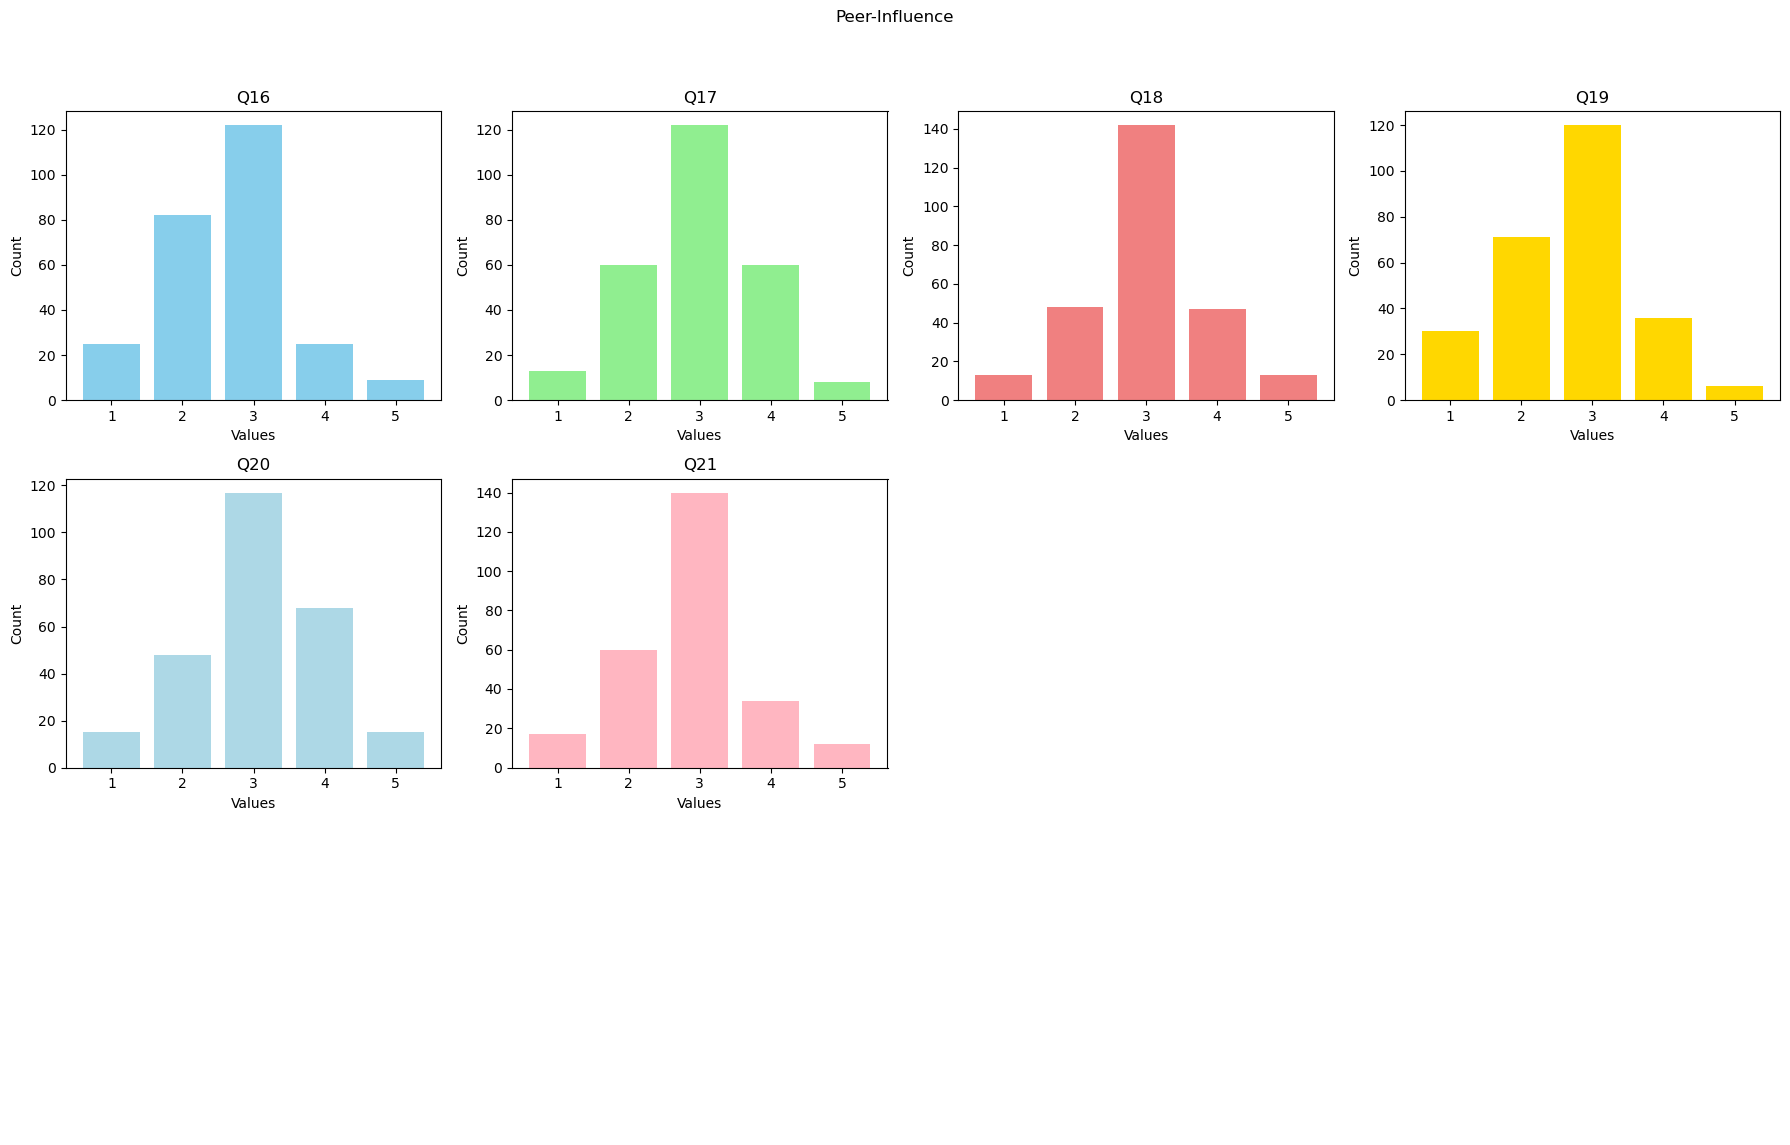

In [24]:
# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Peer-Influence')

# Plot each question's value counts
axs[0, 0].bar(value_counts_q16.index, value_counts_q16.values, color='skyblue')
axs[0, 0].set_title('Q16')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Count')

axs[0, 1].bar(value_counts_q17.index, value_counts_q17.values, color='lightgreen')
axs[0, 1].set_title('Q17')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Count')

axs[0, 2].bar(value_counts_q18.index, value_counts_q18.values, color='lightcoral')
axs[0, 2].set_title('Q18')
axs[0, 2].set_xlabel('Values')
axs[0, 2].set_ylabel('Count')

axs[0, 3].bar(value_counts_q19.index, value_counts_q19.values, color='gold')
axs[0, 3].set_title('Q19')
axs[0, 3].set_xlabel('Values')
axs[0, 3].set_ylabel('Count')

axs[1, 0].bar(value_counts_q20.index, value_counts_q20.values, color='lightblue')
axs[1, 0].set_title('Q20')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Count')

axs[1, 1].bar(value_counts_q21.index, value_counts_q21.values, color='lightpink')
axs[1, 1].set_title('Q21')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Count')

# Hide the remaining subplots
for ax in axs[1, 2:].flatten():
    ax.axis('off')

# Hide the last row
for ax in axs[2].flatten():
    ax.axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plot shows the distribution of responses to questions Q16 through Q21 on peer influence. Most respondents gave a middle value (3) for all questions, indicating a generally neutral or balanced view. Extreme values (1 and 5) are less common, suggesting that respondents mostly have moderate opinions. This indicates that, overall, peer influence does not significantly affect respondents' financial management or planning.

## Objective 10: Overall Insight for Investment Behaviour

In [25]:
# Get the value counts for each question
value_counts_q22 = df['q22'].value_counts().sort_index()
value_counts_q23 = df['q23'].value_counts().sort_index()
value_counts_q24 = df['q24'].value_counts().sort_index()
value_counts_q25 = df['q25'].value_counts().sort_index()
value_counts_q26 = df['q26'].value_counts().sort_index()
value_counts_q27 = df['q27'].value_counts().sort_index()
value_counts_q28 = df['q28'].value_counts().sort_index()
value_counts_q29 = df['q29'].value_counts().sort_index()
value_counts_q30 = df['q30'].value_counts().sort_index()

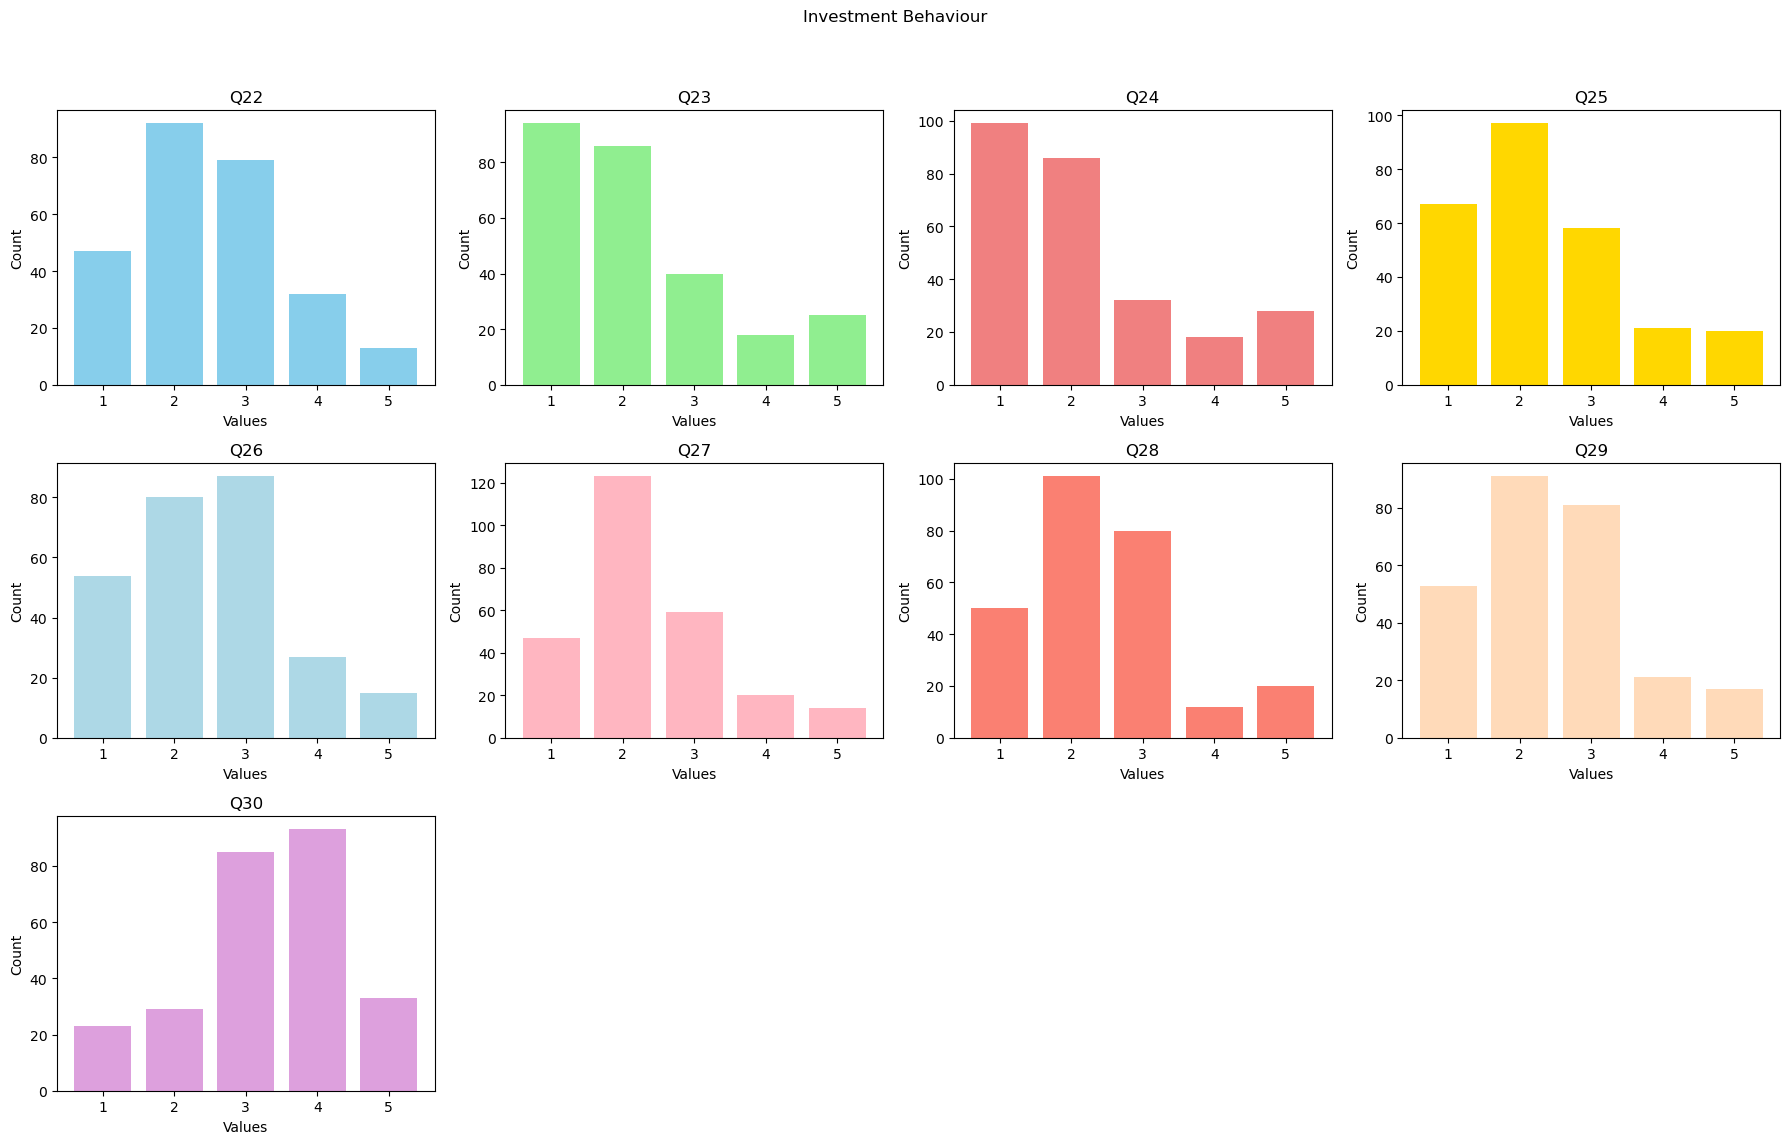

In [26]:
# Create subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))
fig.suptitle('Investment Behaviour')

# Plot each question's value counts
axs[0, 0].bar(value_counts_q22.index, value_counts_q22.values, color='skyblue')
axs[0, 0].set_title('Q22')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Count')

axs[0, 1].bar(value_counts_q23.index, value_counts_q23.values, color='lightgreen')
axs[0, 1].set_title('Q23')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Count')

axs[0, 2].bar(value_counts_q24.index, value_counts_q24.values, color='lightcoral')
axs[0, 2].set_title('Q24')
axs[0, 2].set_xlabel('Values')
axs[0, 2].set_ylabel('Count')

axs[0, 3].bar(value_counts_q25.index, value_counts_q25.values, color='gold')
axs[0, 3].set_title('Q25')
axs[0, 3].set_xlabel('Values')
axs[0, 3].set_ylabel('Count')

axs[1, 0].bar(value_counts_q26.index, value_counts_q26.values, color='lightblue')
axs[1, 0].set_title('Q26')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Count')

axs[1, 1].bar(value_counts_q27.index, value_counts_q27.values, color='lightpink')
axs[1, 1].set_title('Q27')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Count')

axs[1, 2].bar(value_counts_q28.index, value_counts_q28.values, color='salmon')
axs[1, 2].set_title('Q28')
axs[1, 2].set_xlabel('Values')
axs[1, 2].set_ylabel('Count')

axs[1, 3].bar(value_counts_q29.index, value_counts_q29.values, color='peachpuff')
axs[1, 3].set_title('Q29')
axs[1, 3].set_xlabel('Values')
axs[1, 3].set_ylabel('Count')

axs[2, 0].bar(value_counts_q30.index, value_counts_q30.values, color='plum')
axs[2, 0].set_title('Q30')
axs[2, 0].set_xlabel('Values')
axs[2, 0].set_ylabel('Count')

# Hide the remaining subplots
for ax in axs[2, 1:].flatten():
    ax.axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The plot shows responses to questions Q22 through Q30 on investment behavior. Most respondents gave low scores (1 and 2), with 2 being the most common, indicating a generally negative or low confidence in their investment behavior. Few respondents gave high scores (4 and 5), except for Q30, where many gave higher scores (3 and 4), suggesting a more positive view on this particular question.

# Clustering

## Feature Engineering

- There are no missing values, so no handling is required.
- No handling of outliers because the dataset consists of categorical encoding.
- No scaling is necessary since there are no numerical columns.

In [27]:
# duplicate original dataset
df_copy = df.copy(deep=True)

### Feature Selection

#### Checking Feature Correlation

On feature selection, we will check for correlation by examining whether there is multicollinearity using the Variance Inflation Factor (VIF) and the phik library. If the multicollinearity calculation results are very high or if the correlation is strong, then the column will be dropped. This is because a high correlation between independent variables can cause the regression coefficients to become unstable and may change significantly when the data sample changes. 
In this case, we define `high multicollinearity as above 30 and strong correlation as above 0.9`.

In [28]:
# calculate VIF untuk setiap feature
vif = pd.DataFrame()
vif['variable'] = df_copy.columns
vif['vif'] = [variance_inflation_factor(df, i) for i in range(df_copy.shape[1])] #1 adalah jumlah column
vif

,variable,vif
0,gender,1.683430
1,age,1.682031
2,allowance,1.790041
3,q1,29.367130
4,q2,22.743347
5,q3,21.477253
6,q4,25.885680
7,q5,26.329880
8,q6,26.184193
9,q7,22.994690


In [29]:
# calculate correlation matrix with phik
phik_overview = df_copy.phik_matrix()
phik_overview

interval columns not set, guessing: ['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30']


,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.105419,0.000000,0.000000,0.039515,0.000000,0.049607,0.060850,0.006841,0.000000,0.000000,0.039438,0.000000,0.110003,0.000000,0.103859,0.144275,0.151979,0.000000,0.064116,0.101871,0.070380,0.000000,0.052701,0.103756,0.000000,0.000000,0.000000,0.084730
age,0.000000,1.000000,0.323376,0.097609,0.143545,0.197647,0.000000,0.121757,0.104689,0.077009,0.103675,0.118760,0.034565,0.000000,0.000000,0.000000,0.124505,0.000000,0.127714,0.114302,0.026807,0.000000,0.143107,0.137378,0.000000,0.088975,0.029897,0.000000,0.000000,0.000000,0.000000,0.105920,0.057993
allowance,0.000000,0.323376,1.000000,0.000000,0.041177,0.179005,0.166173,0.057819,0.122824,0.086604,0.031232,0.109421,0.138813,0.142183,0.182348,0.048155,0.114462,0.000000,0.188106,0.000000,0.058256,0.085068,0.060673,0.132597,0.000000,0.000000,0.101975,0.150153,0.000000,0.126558,0.031391,0.095233,0.000000
q1,0.000000,0.097609,0.000000,1.000000,0.551730,0.577924,0.466210,0.719303,0.543319,0.247068,0.000000,0.279326,0.000000,0.108150,0.194757,0.312684,0.290633,0.000000,0.394613,0.377422,0.493806,0.282350,0.140614,0.626029,0.464745,0.115225,0.225472,0.297748,0.434461,0.327871,0.276427,0.379515,0.434058
q2,0.000000,0.143545,0.041177,0.551730,1.000000,0.812810,0.911798,0.277878,0.820062,0.674515,0.612614,0.657396,0.463575,0.538207,0.582780,0.594234,0.554521,0.322535,0.698034,0.446291,0.271010,0.353633,0.351083,0.531401,0.773980,0.745317,0.764520,0.766947,0.702850,0.762428,0.737699,0.697806,0.398456
q3,0.105419,0.197647,0.179005,0.577924,0.812810,1.000000,0.853208,0.463073,0.848879,0.453490,0.509695,0.504069,0.457394,0.429233,0.431194,0.510569,0.525305,0.245880,0.744697,0.418314,0.506708,0.385193,0.449334,0.582748,0.647126,0.566859,0.588007,0.681295,0.600095,0.675635,0.635244,0.597903,0.332587
q4,0.000000,0.000000,0.166173,0.466210,0.911798,0.853208,1.000000,0.474503,0.815735,0.539548,0.569978,0.524019,0.395113,0.473897,0.497367,0.559766,0.503477,0.223617,0.667377,0.394447,0.383756,0.415261,0.256746,0.494875,0.707228,0.681039,0.678859,0.747176,0.693293,0.712240,0.682597,0.687777,0.400661
q5,0.000000,0.121757,0.057819,0.719303,0.277878,0.463073,0.474503,1.000000,0.468658,0.000000,0.168694,0.220560,0.131313,0.263755,0.306889,0.308565,0.383195,0.000000,0.501687,0.602039,0.653759,0.355764,0.124118,0.662837,0.154081,0.237466,0.260234,0.302793,0.357942,0.341993,0.288803,0.371693,0.554168
q6,0.039515,0.104689,0.122824,0.543319,0.820062,0.848879,0.815735,0.468658,1.000000,0.404030,0.554335,0.584983,0.437355,0.478889,0.431977,0.473793,0.537836,0.000000,0.629165,0.360149,0.397895,0.269184,0.468613,0.523652,0.674742,0.674076,0.631821,0.699205,0.644036,0.753863,0.694784,0.664539,0.200024
q7,0.000000,0.077009,0.086604,0.247068,0.674515,0.453490,0.539548,0.000000,0.404030,1.000000,0.730902,0.790986,0.606666,0.639845,0.620428,0.683770,0.680743,0.430466,0.500837,0.239456,0.127675,0.243481,0.333815,0.337895,0.651541,0.583340,0.583071,0.578284,0.631225,0.663389,0.635817,0.583018,0.422994


From the VIF results, the columns to be dropped are as follows:
- Q8: 37.574030
- Q9: 47.095343 
- Q11: 42.497058
- Q14: 30.758052
- Q28: 32.224748

From the phik results, the columns to be dropped are as follows:
- Q2-Q4 0.914042 -> decision: drop Q4
- Q8-Q9 0.912521 -> decision: drop Q9
- Q23-Q24 0.934129 -> decision: drop Q24
- Q24-Q25 0.923008 -> decision: drop Q24
- Q28-Q29 0.925983 -> decision: drop Q28

Based on the results of phik and VIF, we will `drop 5 columns: Q4, Q9, Q11, Q24, and Q28`. In this case, `Q8 and Q14 are not dropped because they are still considered acceptable`.

In [30]:
# dropping 5 column
df_copy.drop(['q4','q9','q11','q24','q28'],axis= 1,inplace=True)

In [31]:
# choose features
features = df_copy.columns.tolist()
features

['gender',
 'age',
 'allowance',
 'q1',
 'q2',
 'q3',
 'q5',
 'q6',
 'q7',
 'q8',
 'q10',
 'q12',
 'q13',
 'q14',
 'q15',
 'q16',
 'q17',
 'q18',
 'q19',
 'q20',
 'q21',
 'q22',
 'q23',
 'q25',
 'q26',
 'q27',
 'q29',
 'q30']

### Dimensionality Reduction using PCA

The purpose of using PCA (Principal Component Analysis) is to address the issue of the `curse of dimensionality`, where a high number of features makes the model more complex and increases the risk of overfitting. This is achieved by reducing the dimensionality of the data after clustering, allowing for better visualization to observe patterns among different groups and helping to determine the most relevant features after dimensionality reduction, while still preserving important information.

In [32]:
# dimensionality reduction using PCA
pca = PCA()
pca.fit(df_copy)

PCA()

## Model Development

First, we want to see how many features remain after performing feature engineering.

In [33]:
# check dataset shape
df_copy.shape

(263, 28)

In determining the number of features, we use cummulative ratio and eigenvalues. Eigenvalues represent the magnitude of variance explained by each principal component in PCA, while the cumulative ratio shows the proportion of total variance captured by the sum of the principal components up to a given point.

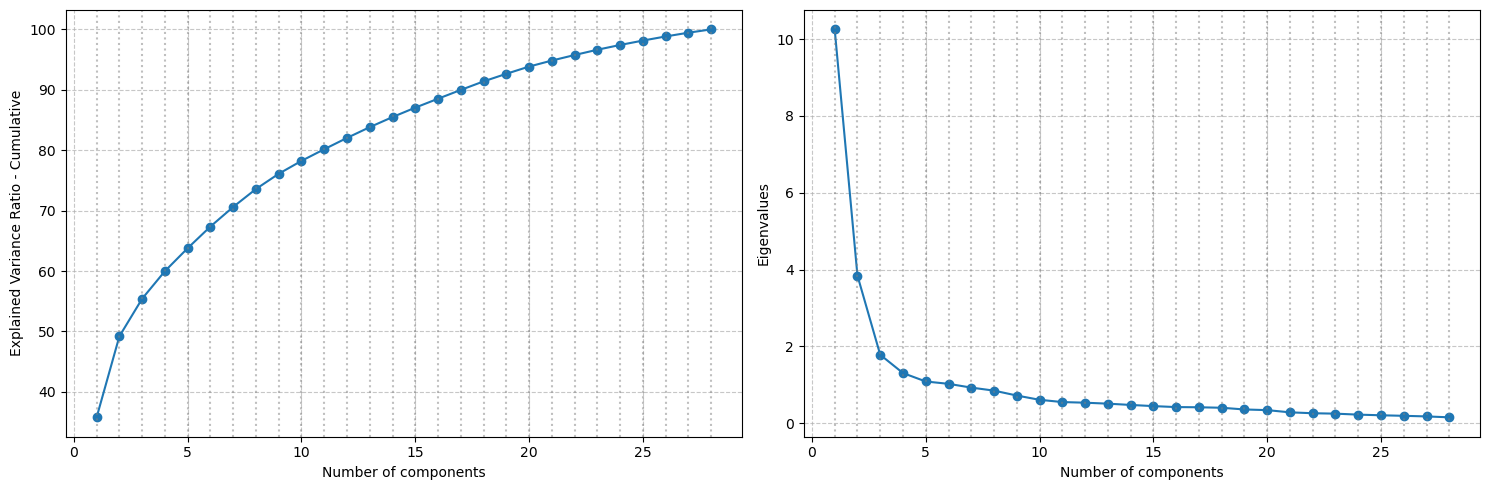

In [34]:
# Data visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot Cumulative of Explained Variance Ratio
axes[0].plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_ * 100), marker='o')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].set_xlabel('Number of components')
axes[0].set_ylabel('Explained Variance Ratio - Cumulative')

# Adding a vertical grid line to the first subplot
for i in range(1, len(pca.explained_variance_ratio_)+1):
    axes[0].axvline(x=i, linestyle=':', color='grey', alpha=0.5)

# Plot Eigenvalues
axes[1].plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_, marker='o')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].set_xlabel('Number of components')
axes[1].set_ylabel('Eigenvalues')

# Adding a vertical grid line to the second subplot
for i in range(1, len(pca.explained_variance_ratio_)+1):
    axes[1].axvline(x=i, linestyle=':', color='grey', alpha=0.5)

# Show plot
plt.tight_layout()
plt.show()

For more accurate results, we will perform dimensionality reduction by selecting the number of components that can explain 90% of the total data variance. The reason we want to retain 90% of the information is to reduce bias in the clustering process.

In [35]:
# check the number of features if we want to retain 90% of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.90) + 1 #+1 because indexing starts from 0
num_features

18

After determining the number of components to use, we will perform dimensionality reduction based on the results obtained previously.

In [36]:
# train the model with 28 feature
pca = PCA(n_components=num_features)
pca.fit(df_copy)

df_pca = pca.transform(df_copy)

## Clustering

In this case, respondents will be grouped using the K-Means method to cluster them based on their characteristic tendencies into different groups.

Below is the data visualization before performing clustering.

<Axes: >

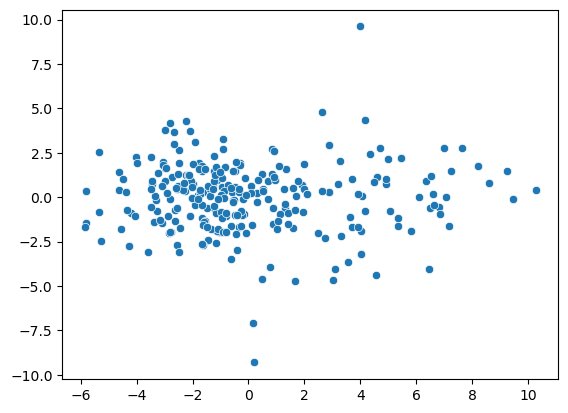

In [37]:
# check plot before clustering
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1])

### Elbow Method

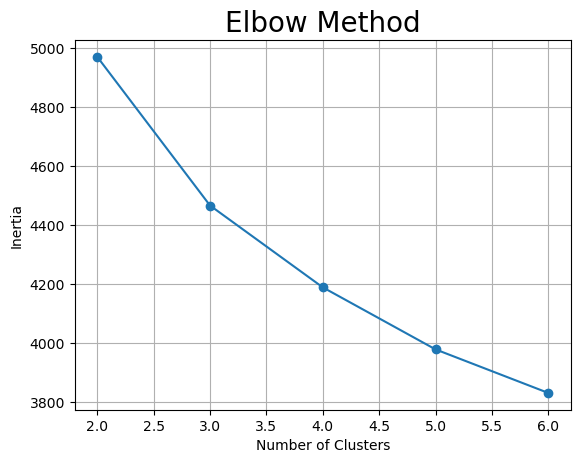

In [38]:
# find the optimal number of clusters using Elbow Method
inertia = []
random_state = 10
max_cluster = 6
for i in range(2, max_cluster+1):
    kmeans = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, max_cluster+1),inertia,marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The appropriate number of clusters will make the characteristics of each cluster clear and distinct from one another. However, the choice of the number of clusters is subjective, so we need to examine the visualization from the elbow method.
From the plot above, the maximum elbow (the point where the curve changes abruptly from vertical to horizontal) occurs at either cluster 3 or 4.

### Silhoutte Score and Plot

To determine the optimal number of clusters, we will use two different methods: the Silhouette Score and the Silhouette Plot. This aims to provide different perspectives and compare which method is best for determining the optimal number of clusters.

In [39]:
# function to create silhouette plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.30013060175004047
For n_clusters = 3 The average silhouette_score is : 0.14177100105153406
For n_clusters = 4 The average silhouette_score is : 0.1108078924615964
For n_clusters = 5 The average silhouette_score is : 0.10569631255383692


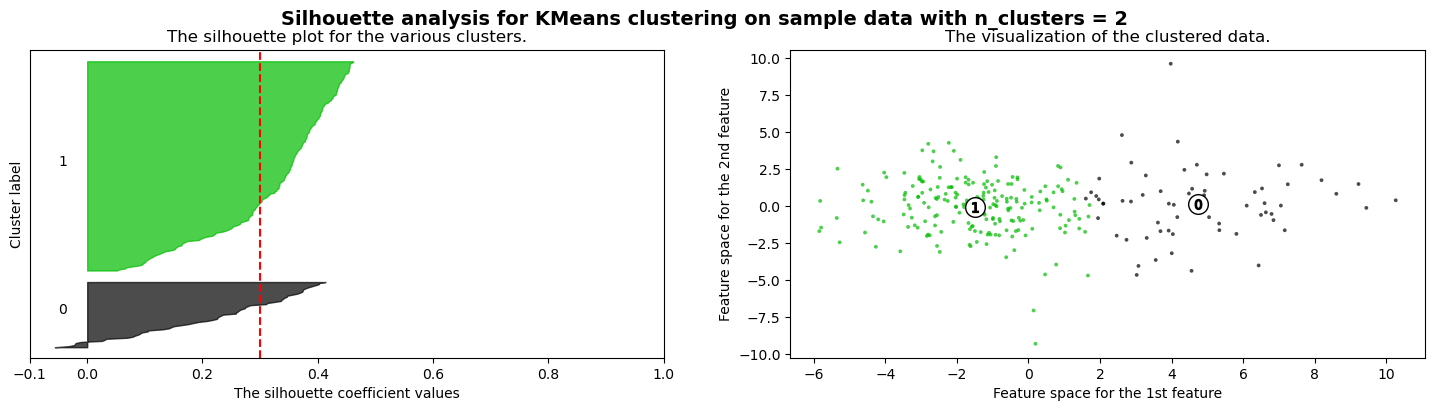

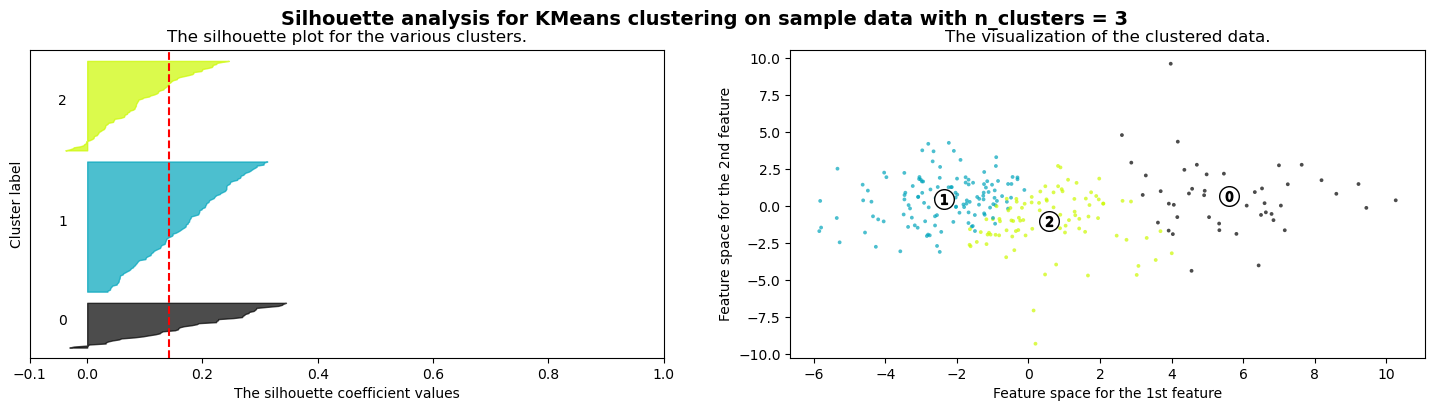

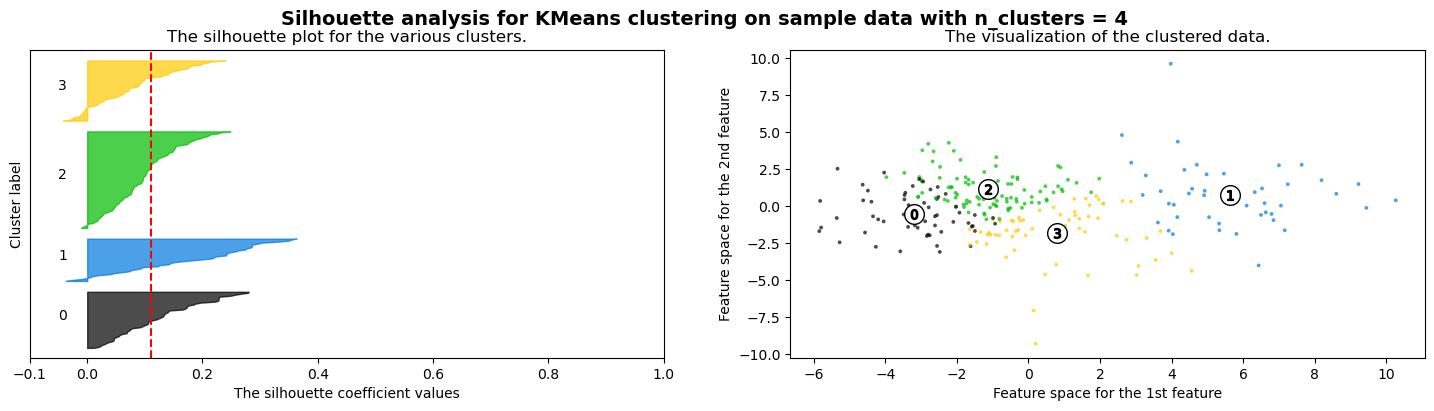

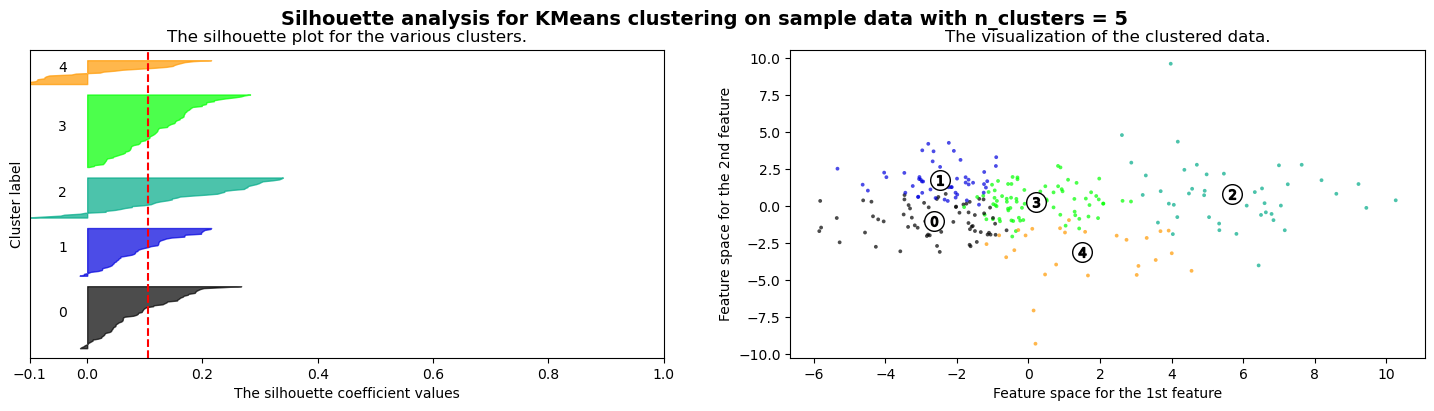

In [40]:
# display Silhouette Score and plot Silhouette Plot
plot_silhouette(range(2, max_cluster), df_pca, random_state)

Based on the previous visualization, where the optimal elbow is between 3 or 4, we focus on comparing the results of the silhouette plot and score for clustering with 3 and 4 clusters only. 

From the results of the silhouette plot and silhouette score, here are the insights:
- The silhouette score for 3 clusters is higher than for 4 clusters.
- The silhouette plot for 4 clusters has a more symmetrical distribution compared to 3 clusters.

Based on this analysis, `the optimal number of clusters is 3`. Although the silhouette plot for 4 clusters shows a more symmetrical shape, cluster 3 has a more uniformly distributed length. Additionally, the silhouette score for cluster 3 is higher.

In [41]:
# using optimal number of clusters for k-means
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)

In [42]:
# clustering with K-Means
clustering_fit = kmeans.fit(df_pca)
clustering_fit

KMeans(n_clusters=3, n_init=10, random_state=10)

In [43]:
# predict cluster
cluster_pred = kmeans.predict(df_pca)
cluster_pred

array([2, 2, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 1,
       2, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 2, 0, 1, 0,
       0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 2, 2, 0, 2, 2, 0, 2])

## Cluster Evaluation

After clustering the respondents, further exploration of each formed cluster is necessary to identify the characteristics of each cluster.

In [44]:
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
0,0,0,0,4,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,1,0,2,2,4,3,3,3,3,3,3,3,3,4,3,3,3,2,3,3,3,4,4,2,3,2,3,4,3,2,2,3
2,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,0,2,1,3,2,3,3,4,5,5,5,3,5,4,4,5,2,2,3,2,3,3,2,2,1,1,2,3,3,2,3
4,0,0,1,2,2,3,2,3,2,5,4,5,3,4,4,4,3,4,2,3,3,3,3,2,1,1,2,2,1,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,3,3,3,4,3,3,4,4,4,2,4,4,4,5,4,5,5,5,3,5,5,4,3
259,0,0,0,2,2,4,4,3,3,4,2,5,4,4,2,4,5,1,1,4,4,4,2,1,2,1,1,1,1,1,1,1,1
260,0,1,2,2,3,3,3,3,4,3,2,2,1,2,1,3,2,1,1,4,3,2,2,2,2,1,1,2,1,1,1,1,4
261,0,1,2,4,3,2,3,5,4,4,2,2,5,3,3,3,2,3,5,2,3,4,3,2,3,4,4,4,3,4,3,2,1


In [45]:
# insert clustering result into dataset
df['cluster'] = cluster_pred

# show dataframe with new column
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,4,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,2
1,1,1,0,2,2,4,3,3,3,3,3,3,3,3,4,3,3,3,2,3,3,3,4,4,2,3,2,3,4,3,2,2,3,2
2,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
3,1,1,0,2,1,3,2,3,3,4,5,5,5,3,5,4,4,5,2,2,3,2,3,3,2,2,1,1,2,3,3,2,3,1
4,0,0,1,2,2,3,2,3,2,5,4,5,3,4,4,4,3,4,2,3,3,3,3,2,1,1,2,2,1,1,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,3,3,3,4,3,3,4,4,4,2,4,4,4,5,4,5,5,5,3,5,5,4,3,0
259,0,0,0,2,2,4,4,3,3,4,2,5,4,4,2,4,5,1,1,4,4,4,2,1,2,1,1,1,1,1,1,1,1,2
260,0,1,2,2,3,3,3,3,4,3,2,2,1,2,1,3,2,1,1,4,3,2,2,2,2,1,1,2,1,1,1,1,4,2
261,0,1,2,4,3,2,3,5,4,4,2,2,5,3,3,3,2,3,5,2,3,4,3,2,3,4,4,4,3,4,3,2,1,0


In [46]:
# duplicate original dataset
df_eda_cluster = df.copy(deep=True)
df_eda_cluster

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster
0,0,0,0,4,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,2
1,1,1,0,2,2,4,3,3,3,3,3,3,3,3,4,3,3,3,2,3,3,3,4,4,2,3,2,3,4,3,2,2,3,2
2,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
3,1,1,0,2,1,3,2,3,3,4,5,5,5,3,5,4,4,5,2,2,3,2,3,3,2,2,1,1,2,3,3,2,3,1
4,0,0,1,2,2,3,2,3,2,5,4,5,3,4,4,4,3,4,2,3,3,3,3,2,1,1,2,2,1,1,2,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,3,3,3,4,3,3,4,4,4,2,4,4,4,5,4,5,5,5,3,5,5,4,3,0
259,0,0,0,2,2,4,4,3,3,4,2,5,4,4,2,4,5,1,1,4,4,4,2,1,2,1,1,1,1,1,1,1,1,2
260,0,1,2,2,3,3,3,3,4,3,2,2,1,2,1,3,2,1,1,4,3,2,2,2,2,1,1,2,1,1,1,1,4,2
261,0,1,2,4,3,2,3,5,4,4,2,2,5,3,3,3,2,3,5,2,3,4,3,2,3,4,4,4,3,4,3,2,1,0


<Axes: >

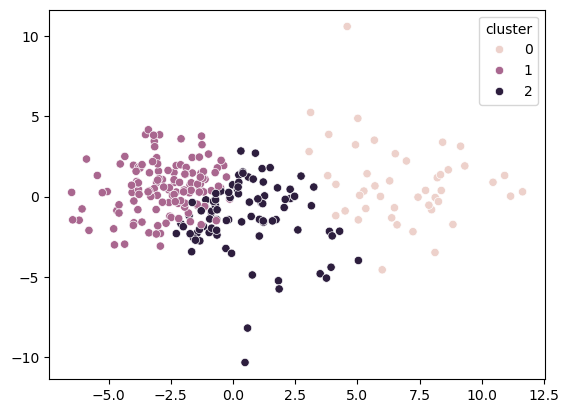

In [47]:
# cluster visualization in 2D
pca_2d = PCA(n_components=2) #to visualize in 2d
pca_2d.fit(df)

df_pca_2d = pca_2d.fit_transform(df)

sns.scatterplot(x=df_pca_2d[:,0], y=df_pca_2d[:,1], hue=df['cluster'])

### Objective 1: Overall Analysis for each Clusters

In [48]:
# grouping each cluster based on mean values
cluster_summary = df.groupby('cluster').mean()
cluster_summary

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.288889,0.444444,0.711111,3.288889,4.022222,3.666667,3.911111,3.133333,3.777778,2.355556,2.266667,2.133333,2.266667,2.288889,2.088889,2.622222,2.333333,3.088889,3.600000,2.911111,3.044444,3.177778,2.911111,3.444444,3.888889,4.444444,4.511111,4.266667,3.755556,4.044444,4.022222,3.977778,2.622222
1,0.255814,0.333333,0.503876,2.813953,1.798450,2.294574,2.201550,2.922481,2.178295,4.224806,4.472868,4.713178,4.085271,4.062016,4.240310,3.868217,4.038760,3.418605,2.395349,2.992248,3.062016,2.604651,3.364341,2.782946,1.968992,1.550388,1.488372,1.767442,2.062016,1.829457,1.930233,1.976744,3.589147
2,0.359551,0.269663,0.382022,2.786517,2.460674,2.741573,2.606742,2.853933,2.606742,3.269663,3.415730,3.606742,2.887640,3.089888,2.988764,2.707865,2.786517,2.382022,2.573034,2.943820,2.876404,2.550562,2.741573,2.685393,2.606742,2.056180,2.067416,2.235955,2.505618,2.269663,2.359551,2.393258,3.280899


In [49]:
# grouping each cluster based on value counts
cluster_count = df['cluster'].value_counts()
cluster_count

cluster
1    129
2     89
0     45
Name: count, dtype: int64

In [50]:
# show cluster summary
for cluster in [0, 1, 2]:
    print(f"Cluster {cluster} Analysis:")
    print(f"Number of respondents: {cluster_count[cluster]}")
    cluster_means = cluster_summary.loc[cluster]
    print("\nFinancial Literacy:")
    for q in range(1, 7):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    
    print("\nSelf-Control:")
    for q in range(7, 16):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    
    print("\nPeer-Influence:")
    for q in range(16, 22):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    
    print("\nInvestment Behavior:")
    for q in range(22, 31):
        print(f"q{q}: {cluster_means[f'q{q}']:.2f}")
    print("\n")

Cluster 0 Analysis:
Number of respondents: 45

Financial Literacy:
q1: 3.29
q2: 4.02
q3: 3.67
q4: 3.91
q5: 3.13
q6: 3.78

Self-Control:
q7: 2.36
q8: 2.27
q9: 2.13
q10: 2.27
q11: 2.29
q12: 2.09
q13: 2.62
q14: 2.33
q15: 3.09

Peer-Influence:
q16: 3.60
q17: 2.91
q18: 3.04
q19: 3.18
q20: 2.91
q21: 3.44

Investment Behavior:
q22: 3.89
q23: 4.44
q24: 4.51
q25: 4.27
q26: 3.76
q27: 4.04
q28: 4.02
q29: 3.98
q30: 2.62


Cluster 1 Analysis:
Number of respondents: 129

Financial Literacy:
q1: 2.81
q2: 1.80
q3: 2.29
q4: 2.20
q5: 2.92
q6: 2.18

Self-Control:
q7: 4.22
q8: 4.47
q9: 4.71
q10: 4.09
q11: 4.06
q12: 4.24
q13: 3.87
q14: 4.04
q15: 3.42

Peer-Influence:
q16: 2.40
q17: 2.99
q18: 3.06
q19: 2.60
q20: 3.36
q21: 2.78

Investment Behavior:
q22: 1.97
q23: 1.55
q24: 1.49
q25: 1.77
q26: 2.06
q27: 1.83
q28: 1.93
q29: 1.98
q30: 3.59


Cluster 2 Analysis:
Number of respondents: 89

Financial Literacy:
q1: 2.79
q2: 2.46
q3: 2.74
q4: 2.61
q5: 2.85
q6: 2.61

Self-Control:
q7: 3.27
q8: 3.42
q9: 3.61
q10: 2.8

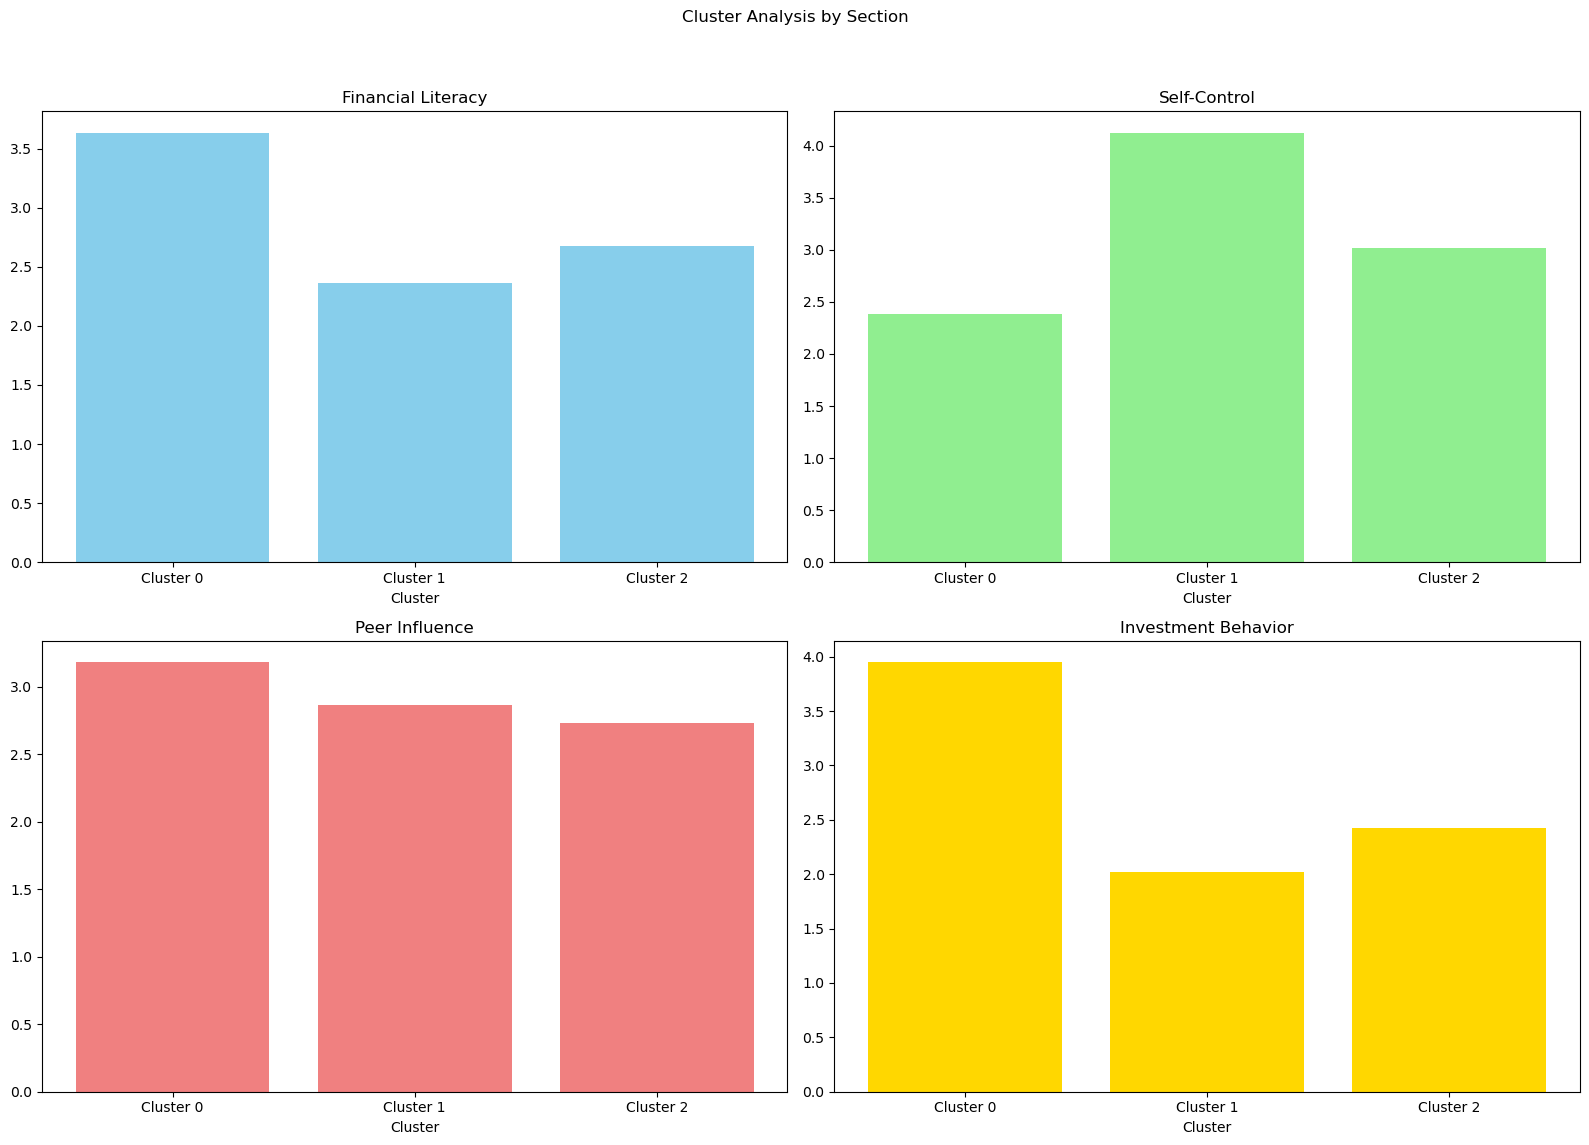

In [51]:
# Define the data
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
financial_literacy = [np.mean([3.29, 4.02, 3.67, 3.91, 3.13, 3.78]), #for cluster 0
                      np.mean([2.81, 1.80, 2.29, 2.20, 2.92, 2.18]), #for cluster 1
                      np.mean([2.79, 2.46, 2.74, 2.61, 2.85, 2.61])] #for cluster 2

self_control = [np.mean([2.36, 2.27, 2.13, 2.27, 2.29, 2.09, 2.62, 2.33, 3.09]), #for cluster 0
                np.mean([4.22, 4.47, 4.71, 4.09, 4.06, 4.24, 3.87, 4.04, 3.42]), #for cluster 1
                np.mean([3.27, 3.42, 3.61, 2.89, 3.09, 2.99, 2.71, 2.79, 2.38])] #for cluster 2

peer_influence = [np.mean([3.60, 2.91, 3.04, 3.18, 2.91, 3.44]), #for cluster 0
                  np.mean([2.40, 2.99, 3.06, 2.60, 3.36, 2.78]), #for cluster 1
                  np.mean([2.57, 2.94, 2.88, 2.55, 2.74, 2.69])] #for cluster 2

investment_behavior = [np.mean([3.89, 4.44, 4.51, 4.27, 3.76, 4.04, 4.02, 3.98, 2.62]), #for cluster 0
                       np.mean([1.97, 1.55, 1.49, 1.77, 2.06, 1.83, 1.93, 1.98, 3.59]), #for cluster 1
                       np.mean([2.61, 2.06, 2.07, 2.24, 2.51, 2.27, 2.36, 2.39, 3.28])] #for cluster 2

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cluster Analysis by Section')

# Plot Financial Literacy
axs[0, 0].bar(clusters, financial_literacy, color='skyblue')
axs[0, 0].set_title('Financial Literacy')
axs[0, 0].set_xlabel('Cluster')

# Plot Self-Control
axs[0, 1].bar(clusters, self_control, color='lightgreen')
axs[0, 1].set_title('Self-Control')
axs[0, 1].set_xlabel('Cluster')

# Plot Peer Influence
axs[1, 0].bar(clusters, peer_influence, color='lightcoral')
axs[1, 0].set_title('Peer Influence')
axs[1, 0].set_xlabel('Cluster')

# Plot Investment Behavior
axs[1, 1].bar(clusters, investment_behavior, color='gold')
axs[1, 1].set_title('Investment Behavior')
axs[1, 1].set_xlabel('Cluster')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Here are the overall analysis for each cluster:
- Cluster 0: This cluster consists of individuals who are highly knowledgeable about finance and very active in investments but tend to have low self-control, leading to potentially impulsive investment decisions.
- Cluster 1: This cluster consists of individuals with good self-control and cautious spending habits but with limited financial knowledge and less active in investment activities.
- Cluster 2: This cluster consists of individuals with a balanced level of financial knowledge, self-control, peer influence, and investment behavior. They are neither highly active in investments nor lack knowledge, showing a moderate approach overall.

For better understanding, we will examine each section in detail to better understand the characteristics of each cluster.

### Objective 2: Cluster Based on Financial Literacy

To find the details about financial literacy on each cluster, we use the information from question 6, "I have the ability to prepare my own budget weekly and monthly" to understand financial management habits that may indicate a commitment to long-term financial planning and investment risk management.

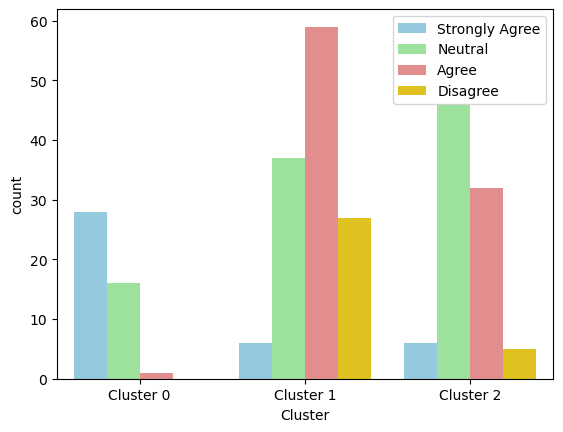

In [52]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q6:
    q6 = float(i)
    if (q6 == 5 or q6 == 4):
        lists.append('Strongly Agree')
    elif (q6 == 2):
        lists.append('Agree')
    elif (q6 == 3):
        lists.append('Neutral')
    elif (q6 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q6_cat'] = lists

# data visualization
q_6 = df_eda_cluster.groupby('cluster')['q6_cat'].value_counts().reset_index()
sns.barplot(q_6, x='cluster', y='count', hue='q6_cat', palette=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xticks(ticks=[0, 1, 2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Cluster')
plt.legend()

Based on the image above, the insight obtained is that many respondents in cluster 0 have the best financial management habits, as evidenced by the dominance of respondents in cluster 0 who strongly agree, with no respondents disagreeing. This indicates that cluster 0 has the best long-term financial planning.

On the other hand, cluster 1 shows poorer financial management habits compared to cluster 2, as indicated by the fewer respondents in cluster 1 who strongly agree. This suggests that there may be financial constraints leading cluster 1 to invest only in stable and safe returns.

### Objective 3: Clustering Based on Self-Control in Financial Management

To find the details about self control on each cluster, we use the information from question 10, "I see it, I like it, I buy it describes me" to understand respondents' behavior in making purchasing decisions. In this case, impulsive buying behavior indicates a lack of self-control in spending.

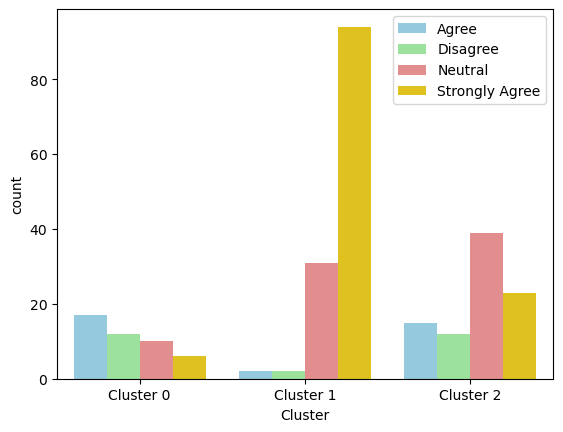

In [53]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q10:
    q10 = float(i)
    if (q10 == 5 or q10 == 4):
        lists.append('Strongly Agree')
    elif (q10 == 2):
        lists.append('Agree')
    elif (q10 == 3):
        lists.append('Neutral')
    elif (q10 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q10_cat'] = lists

# data visualization
q_10 = df_eda_cluster.groupby('cluster')['q10_cat'].value_counts().reset_index()
sns.barplot(q_10, x='cluster', y='count', hue='q10_cat', palette=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xticks(ticks=[0, 1, 2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Cluster')
plt.legend()

Based on the image above, the insight obtained is that cluster 1 exhibits the poorest self-control compared to other clusters, as evidenced by the dominance of respondents in cluster 1 who strongly agree, indicating frequent impulsive purchases.

On the other hand, cluster 0 demonstrates the best self-control, as shown by the fewest respondents in cluster 0 who strongly agree. This suggests that cluster 0 exercises self-control by purchasing only what is necessary, rather than making impulsive purchases, which aligns with the previous characteristic where cluster 0 showed the best financial planning.

### Objective 4: Clusters Based on Peer Influence in Financial Management

To find the details about peer influence on each cluster, we use the information from question 17, "I always discuss financial management issues (saving) with my friends" to measure how often respondents talk about financial management, particularly saving, with their friends.

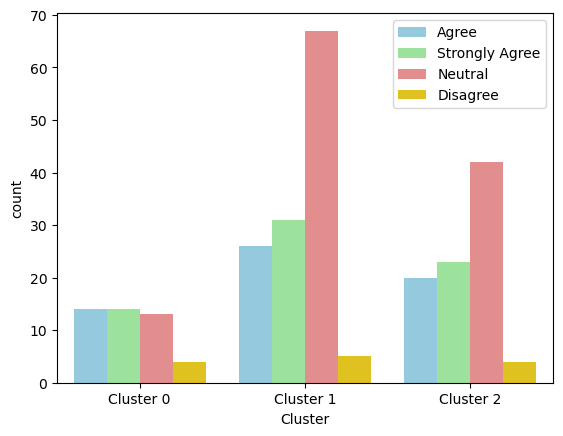

In [54]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q17:
    q17 = float(i)
    if (q17 == 5 or q17 == 4):
        lists.append('Strongly Agree')
    elif (q17 == 2):
        lists.append('Agree')
    elif (q17 == 3):
        lists.append('Neutral')
    elif (q17 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q17_cat'] = lists

# data visualization
q_17 = df_eda_cluster.groupby('cluster')['q17_cat'].value_counts().reset_index()
sns.barplot(q_17, x='cluster', y='count', hue='q17_cat', palette=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xticks(ticks=[0, 1, 2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Cluster')
plt.legend()

Based on the image above, the insight obtained is that peer influence has a significant impact on saving habits in cluster 0, whereas in clusters 1 and 2, the influence is less pronounced. This suggests that peer influence plays a major role in motivating better saving habits in cluster 0, likely due to the possibility that the environment or peers in cluster 0 have a strong understanding of financial literacy.

### Objective 5: Clusters Based on Investment Behaviour

To find the details about investment behaviour on each cluster, we use the information from question 26, "I always have money available in the event of a failed investment" to assess preparedness for handling investment losses. Respondents who have savings available demonstrate their ability to manage and tolerance investment risk.

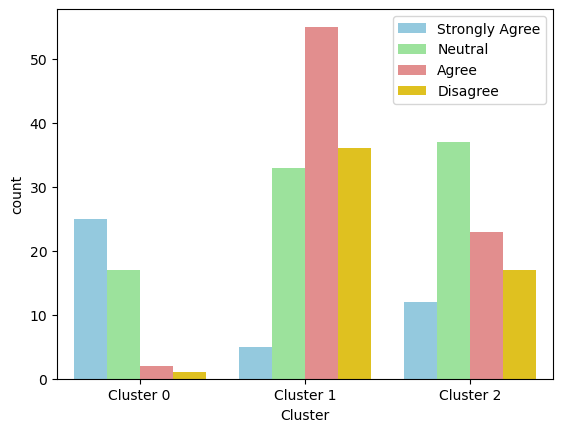

In [55]:
# create list to contain default value
lists = []

# create looping with for in
for i in df_eda_cluster.q26:
    q26 = float(i)
    if (q26 == 5 or q26 == 4):
        lists.append('Strongly Agree')
    elif (q26 == 2):
        lists.append('Agree')
    elif (q26 == 3):
        lists.append('Neutral')
    elif (q26 == 1):
        lists.append('Disagree')

# create new column
df_eda_cluster['q26_cat'] = lists

# data visualization
q_26 = df_eda_cluster.groupby('cluster')['q26_cat'].value_counts().reset_index()
sns.barplot(q_26, x='cluster', y='count', hue='q26_cat', palette=['skyblue', 'lightgreen', 'lightcoral', 'gold'])
plt.xticks(ticks=[0, 1, 2], labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Cluster')
plt.legend()

Based on the image above, the insight obtained is that cluster 0 has additional savings available in case of investment losses, as indicated by the dominance of respondents in cluster 0 who strongly agree. This suggests that cluster 0 has the highest ability to manage investment risk due to having sufficient savings to cover potential losses.

In contrast, although cluster 1 has a dominant number of respondents who agree, there are more respondents who disagree compared to cluster 2. This indicates that cluster 1 has the lowest ability to handle investment risk due to a lack of savings to cover potential losses.

## Conclusion

Based on the K-Means evaluation, the optimal number of clusters is 3. Here are the characteristics of each cluster based on the exploratory data analysis:

- **Cluster 0:**
  - Financial Literacy: `Very high`, with the best financial management habits.
  - Self-Control: `Low`, with the highest level of self-control and spending only as needed.
  - Peer Influence: `Moderate`, with significant influence from peers on saving habits.
  - Investment Behavior: `High`, with the highest ability to handle investment risks due to substantial reserve funds.

- **Cluster 1:**
  - Financial Literacy: `Low`, with generally poor financial management habits.
  - Self-Control: `High`, with the lowest self-control and frequent impulsive spending.
  - Peer Influence: `Low`, with no significant influence from peers on saving habits.
  - Investment Behavior: `Low`, with the lowest ability to handle investment risks due to a lack of reserve funds.

- **Cluster 2:**
  - Financial Literacy: `High`, with good financial management habits.
  - Self-Control: `Moderate`, with reasonably good self-control even though occasionally shop impulsively.
  - Peer Influence: `Low`, with no significant influence from peers on saving habits.
  - Investment Behavior: `Moderate`, with a fair ability to handle investment risks due to some reserve funds.

### Recommendation

Based on the analysis, here are the recommended investment products for each cluster:
- Cluster 0 (Aggressive Investors): These investors are comfortable with high-risk investments and aim for long-term gains. They can handle fluctuations and potential losses in exchange for higher returns. Therefore, suitable investment products include `portfolios dominated by high-risk instruments such as stocks`.
- Cluster 1 (Conservative Investors): These investors prefer low-risk investments with short-term or limited-term goals. They have limited funds and are uncomfortable with investment volatility, opting for more stable and safe returns. Recommended products include `bank deposits, government bonds, and money market mutual funds`.
- Cluster 2 (Moderate Investors): These investors seek medium to long-term gains with a moderate level of risk. They desire higher returns than conservative investments while still valuing stability. Suitable products include `a mixed portfolio of stocks, bonds, deposits, and other assets`.

In [56]:
# rename value on column 'cluster'
df['cluster'] = df['cluster'].replace({0:'Agressive',1:'Conservative',2:'Moderate'})

In [57]:
# save clustered dataset to .csv file
df.to_csv('survey_financial_ref_dataset_clustered.csv',index=False)

---

# Model Development

In [58]:
# Define the mapping for the responses
response_mapping = {
    1: "does not",
    2: "",
    3: "neutral about",
    4: "strongly",
    5: "very strongly"
}

# Define the questions and corresponding summaries
questions_summaries = {
    'q22': "{} regularly puts money aside for the future.",
    'q23': "{} compares prices before making purchases for investment.",
    'q24': "{} considers stock prices before selling.",
    'q25': "{} understands fundamental analysis.",
    'q26': "{} always has money available in case of a failed investment.",
    'q27': "{} plans to manage expenses in order to invest.",
    'q28': "{} saves money in order to invest.",
    'q29': "{} invests to achieve certain goals.",
    'q30': "{} has investment accounts in money and capital markets."
}

# Function to generate descriptive summary for investment behavior
def generate_investment_behavior_summary(row):
    behavior_summary = []
    for question, summary in questions_summaries.items():
        response = row[question]
        behavior_summary.append(summary.format(response_mapping[response]))
    return " ".join(behavior_summary)


In [59]:
# Apply the function to each row to create the new column
df['description'] = df.apply(generate_investment_behavior_summary, axis=1)

## Feature Engineering

### Target Conversion

In [60]:
label_encoder = LabelEncoder()

# encode the labels (classes)
df['label'] = label_encoder.fit_transform(df['cluster'])
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster,description,label
0,0,0,0,4,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,Moderate,neutral about regularly puts money aside for t...,2
1,1,1,0,2,2,4,3,3,3,3,3,3,3,3,4,3,3,3,2,3,3,3,4,4,2,3,2,3,4,3,2,2,3,Moderate,regularly puts money aside for the future. ne...,2
2,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Moderate,does not regularly puts money aside for the fu...,2
3,1,1,0,2,1,3,2,3,3,4,5,5,5,3,5,4,4,5,2,2,3,2,3,3,2,2,1,1,2,3,3,2,3,Conservative,regularly puts money aside for the future. c...,1
4,0,0,1,2,2,3,2,3,2,5,4,5,3,4,4,4,3,4,2,3,3,3,3,2,1,1,2,2,1,1,2,1,3,Conservative,does not regularly puts money aside for the fu...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,3,3,3,4,3,3,4,4,4,2,4,4,4,5,4,5,5,5,3,5,5,4,3,Agressive,strongly regularly puts money aside for the fu...,0
259,0,0,0,2,2,4,4,3,3,4,2,5,4,4,2,4,5,1,1,4,4,4,2,1,2,1,1,1,1,1,1,1,1,Moderate,regularly puts money aside for the future. do...,2
260,0,1,2,2,3,3,3,3,4,3,2,2,1,2,1,3,2,1,1,4,3,2,2,2,2,1,1,2,1,1,1,1,4,Moderate,regularly puts money aside for the future. do...,2
261,0,1,2,4,3,2,3,5,4,4,2,2,5,3,3,3,2,3,5,2,3,4,3,2,3,4,4,4,3,4,3,2,1,Agressive,neutral about regularly puts money aside for t...,0


In [61]:
# assigning class
class_names = label_encoder.classes_
class_names

array(['Agressive', 'Conservative', 'Moderate'], dtype=object)

### Splitting Data

In [62]:
df.columns

Index(['gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7',
       'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17',
       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27',
       'q28', 'q29', 'q30', 'cluster', 'description', 'label'],
      dtype='object')

In [63]:
df_group_target = df.groupby('cluster').size().reset_index().rename(columns={0:'count'})
df_group_target

,cluster,count
0,Agressive,45
1,Conservative,129
2,Moderate,89


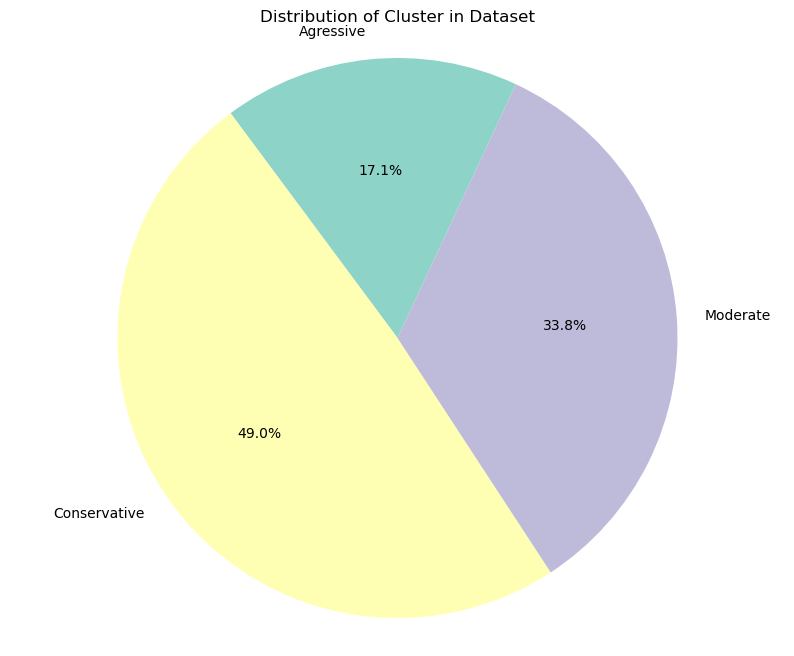

In [64]:
labels = df_group_target['cluster']
sizes = df_group_target['count']

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=65, colors=plt.cm.Set3.colors)
plt.title('Distribution of Cluster in Dataset')
plt.axis('equal')
plt.show()

In [65]:
# assign into new variable, X and y
X = df.drop('label', axis=1)
y = df[['label']]

In [66]:
y.value_counts()

label
1        129
2         89
0         45
Name: count, dtype: int64

In [67]:
# Splitting between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (189, 35)
Val Size   :  (34, 35)
Test Size  :  (40, 35)


Since the number value of the dataset is in a scale 1 - 5, we don't do any handling on outlier number.

### Feature Selection

In [68]:
# assigining new variable temporary contains combination of dataset feature and target
X_train_temp = pd.concat([y_train, X_train], axis=1)
X_train_temp.columns

Index(['label', 'gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5',
       'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16',
       'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26',
       'q27', 'q28', 'q29', 'q30', 'cluster', 'description'],
      dtype='object')

In [69]:
# checking correlation with phik library and display it sorted from highest to lowest
correlation_matrix = X_train_temp.phik_matrix()
print(correlation_matrix['label'].nlargest(35))

interval columns not set, guessing: ['label', 'gender', 'age', 'allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30']
label          1.000000
cluster        1.000000
description    0.988943
q23            0.697108
q27            0.683409
q24            0.682608
q25            0.671865
q2             0.652353
q9             0.637619
q28            0.598812
q8             0.590490
q22            0.583180
q12            0.581891
q14            0.578105
q6             0.563833
q29            0.561257
q4             0.538598
q10            0.529944
q11            0.522348
q7             0.510320
q3             0.477487
q13            0.467850
q16            0.465435
q26            0.459689
q15            0.373324
q21            0.333032
q30            0.303447
allowance      0.270552
q5             0.245027
q20            0.233871
q17

*By determining the threshold of correlation number with cluster feature is 0.1, we decide to drop age and gender column due the value of correlation number with cluster feature (target) is below the threshold.*

In [70]:
# dropping columns
weak_corr = ['age', 'gender']
X_train.drop(weak_corr, axis=1, inplace=True)
X_val.drop(weak_corr, axis=1, inplace=True)
X_test.drop(weak_corr, axis=1, inplace=True)

In [71]:
# dropping irrelevant column (has value same as the label feature)
irrelevant_col = ['cluster']
X_train.drop(irrelevant_col, axis=1, inplace=True)
X_val.drop(irrelevant_col, axis=1, inplace=True)
X_test.drop(irrelevant_col, axis=1, inplace=True)

### Splitting Categorical and Numerical datatype

In [72]:
# assigning a new variable based on relevance feature

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print(num_columns)
print(cat_columns)

['allowance', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30']
['description']


In [73]:
# assigning into new variable based on each columns
X_train_num = X_train[num_columns]
X_val_num = X_val[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_val_cat = X_val[cat_columns]
X_test_cat = X_test[cat_columns]

### Handling Imbalance Data

In [74]:
# concat the splitted dataset based on datatype value in order to handling imbalance data
X_train_imbalanced_new = pd.DataFrame(data=X_train_cat, columns=cat_columns)
X_train_imbalanced_new = pd.concat([X_train_num, X_train_imbalanced_new], axis=1)
X_train_imbalanced_new

,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,description
110,0,3,2,2,2,3,2,5,5,5,5,5,5,4,5,3,3,3,3,3,3,3,3,2,1,2,1,1,2,2,4,neutral about regularly puts money aside for t...
62,0,3,3,4,4,3,5,3,3,4,5,4,3,2,2,3,2,4,5,2,5,1,3,2,2,2,5,3,3,1,4,neutral about regularly puts money aside for t...
238,0,3,3,3,3,3,3,2,4,5,4,4,4,2,3,5,3,4,2,2,3,2,3,1,2,3,4,3,3,3,4,neutral about regularly puts money aside for t...
155,0,2,2,3,3,3,3,4,4,4,5,5,5,3,3,3,3,2,4,3,3,3,3,2,2,3,3,3,3,3,5,neutral about regularly puts money aside for t...
247,0,3,2,2,3,3,2,3,4,5,5,3,5,3,3,4,3,4,3,3,4,3,3,1,1,2,3,2,2,2,4,neutral about regularly puts money aside for t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,0,4,2,3,2,4,1,5,5,5,5,5,5,4,5,4,3,3,4,1,3,3,2,1,1,1,1,1,2,3,4,regularly puts money aside for the future. do...
175,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,very strongly regularly puts money aside for t...
148,0,3,2,2,2,3,2,5,5,5,3,3,3,4,4,3,2,2,2,3,3,3,2,1,1,1,1,1,1,1,3,regularly puts money aside for the future. do...
174,0,3,2,2,2,3,2,5,5,5,3,4,4,5,3,2,2,3,3,3,4,3,2,2,2,2,2,2,2,2,3,regularly puts money aside for the future. c...


In [75]:
# using library SMOTENC regarding handling imbalance data in dataset
smotenc = SMOTENC([31], random_state=22)

X_train, y_train = smotenc.fit_resample(X_train_imbalanced_new, y_train)
y_train.value_counts()

label
0        94
1        94
2        94
Name: count, dtype: int64

### Cardinality Check

In [76]:
# Checking cardinality on each categorical datatype weather they low cardinality or high cardinality (above 10 unique value)
for column in X_train_cat:
    print(f'{column}: {X_train_cat[column].unique()} ({X_train_cat[column].nunique()})')
    if X_train_cat[column].nunique() < 10:
        print(f'\n -- {column} column has low cardinality --\n')
    else:
        print(f'\n -- {column} column has high cardinality --\n')

description: ['neutral about regularly puts money aside for the future.  compares prices before making purchases for investment. does not considers stock prices before selling.  understands fundamental analysis. does not always has money available in case of a failed investment. does not plans to manage expenses in order to invest.  saves money in order to invest.  invests to achieve certain goals. strongly has investment accounts in money and capital markets.'
 'neutral about regularly puts money aside for the future.  compares prices before making purchases for investment.  considers stock prices before selling.  understands fundamental analysis. very strongly always has money available in case of a failed investment. neutral about plans to manage expenses in order to invest. neutral about saves money in order to invest. does not invests to achieve certain goals. strongly has investment accounts in money and capital markets.'
 'neutral about regularly puts money aside for the future.

### Preprocessing With Pipeline

In [77]:
# Create A Pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore')) 

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [78]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)
X_train.shape

(282, 201)

## Model Definition

In [79]:
# Clear session
seed = 18
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Model
model_sequential = Sequential()

# # hidden layer

model_sequential.add(Flatten(input_shape=(X_train.shape[1], )))

model_sequential.add(Dense(128, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dropout(0.075))
model_sequential.add(BatchNormalization())

model_sequential.add(Dense(64, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dropout(0.075))
model_sequential.add(BatchNormalization())

model_sequential.add(Dense(32, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dropout(0.075))
model_sequential.add(BatchNormalization())

model_sequential.add(Dense(16, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dropout(0.075))
model_sequential.add(BatchNormalization())

model_sequential.add(Dense(8, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dropout(0.075))
model_sequential.add(BatchNormalization())

model_sequential.add(Dense(4, activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_sequential.add(Dropout(0.075))
model_sequential.add(BatchNormalization())

# output layer
model_sequential.add(Dense(3, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

model_sequential.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_sequential.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 201)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,915 (148.11 KB)

 Trainable params: 37,411 (146.14 KB)

 Non-trainable params: 504 (1.97 KB)

In [80]:
# # Plot Layers

# tf.keras.utils.plot_model(model_sequential, show_shapes=True)

### Define Callbacks

In [81]:
early_stopping = EarlyStopping(monitor='val_loss', patience=75, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

## Model Training

In [82]:
# Train The Model
history_sequential = model_sequential.fit(X_train,
                                          y_train,
                                          validation_data=(X_val, y_val),
                                          epochs=200,
                                          callbacks=[reduce_lr, early_stopping]
)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - accuracy: 0.4372 - loss: 1.2062 - val_accuracy: 0.2647 - val_loss: 1.1218 - learning_rate: 0.0010
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5381 - loss: 0.9145 - val_accuracy: 0.5588 - val_loss: 0.9707 - learning_rate: 0.0010
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5892 - loss: 0.8594 - val_accuracy: 0.7059 - val_loss: 0.8965 - learning_rate: 0.0010
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6587 - loss: 0.7978 - val_accuracy: 0.7941 - val_loss: 0.8531 - learning_rate: 0.0010
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6467 - loss: 0.8016 - val_accuracy: 0.7353 - val_loss: 0.8335 - learning_rate: 0.0010
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6907 - loss: 0.7570 - val_accuracy: 0.7353 - val_loss: 0.8059 - learning_rate: 0.0010
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6773 - loss: 0.7410 - val_accuracy

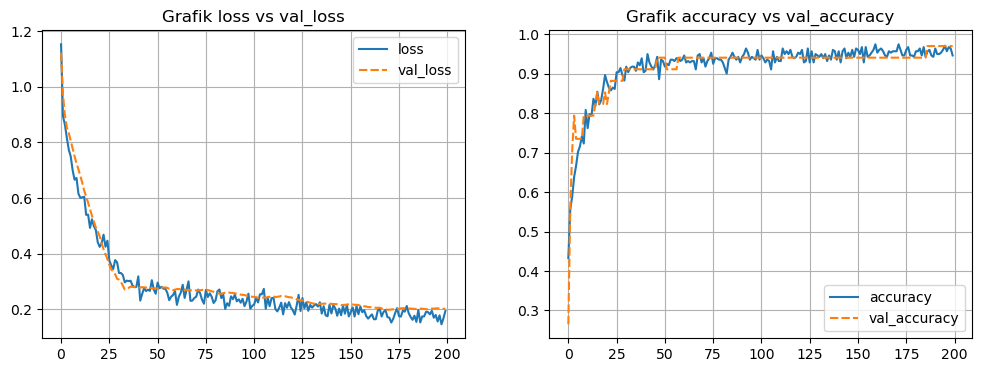

In [83]:
# Plot Training Result

history_sequential_df = pd.DataFrame(history_sequential.history)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.lineplot(data=history_sequential_df[['loss','val_loss']])
plt.grid()
plt.title('Grafik loss vs val_loss')

plt.subplot(1,2,2)
sns.lineplot(data=history_sequential_df[['accuracy','val_accuracy']])
plt.grid()
plt.title('Grafik accuracy vs val_accuracy')

plt.show()

In [84]:
history_sequential_df

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.432624,1.152370,0.264706,1.121809,0.0010
1,0.556738,0.893847,0.558824,0.970747,0.0010
2,0.588652,0.863273,0.705882,0.896543,0.0010
3,0.638298,0.815913,0.794118,0.853144,0.0010
4,0.666667,0.773472,0.735294,0.833539,0.0010
...,...,...,...,...,...
195,0.971631,0.156651,0.970588,0.203498,0.0001
196,0.957447,0.178540,0.970588,0.203487,0.0001
197,0.968085,0.146562,0.970588,0.202448,0.0001
198,0.964539,0.167662,0.970588,0.202375,0.0001


## Model Prediction

In [85]:
#predict 
y_pred = model_sequential.predict(X_test)
y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step


array([[6.7202826e-03, 9.5209640e-01, 4.1183315e-02],
       [6.7202826e-03, 9.5209640e-01, 4.1183315e-02],
       [2.2231042e-02, 7.8128183e-01, 1.9648717e-01],
       [8.2121944e-01, 4.1020244e-02, 1.3776037e-01],
       [6.7202826e-03, 9.5209640e-01, 4.1183315e-02],
       [6.7202826e-03, 9.5209640e-01, 4.1183315e-02],
       [9.7930557e-01, 2.5370109e-03, 1.8157380e-02],
       [1.8590000e-02, 8.4829527e-01, 1.3311467e-01],
       [8.8207163e-03, 9.4656760e-01, 4.4611659e-02],
       [6.7202826e-03, 9.5209640e-01, 4.1183315e-02],
       [9.6910292e-01, 3.6499463e-03, 2.7247168e-02],
       [6.2541537e-02, 6.8456054e-02, 8.6900240e-01],
       [6.9262083e-03, 9.5152217e-01, 4.1551620e-02],
       [6.7202826e-03, 9.5209640e-01, 4.1183315e-02],
       [7.9288378e-02, 7.1722403e-02, 8.4898913e-01],
       [6.7202826e-03, 9.5209640e-01, 4.1183315e-02],
       [7.4377909e-02, 7.0853457e-02, 8.5476863e-01],
       [1.7880898e-02, 8.2772171e-01, 1.5439737e-01],
       [3.5166889e-01, 1.769

In [86]:
# Probability for each class
y_pred_sequential_class = np.argmax(y_pred, axis=1)
y_pred_sequential_class

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       0, 2, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2], dtype=int64)

In [87]:
y_pred_df = pd.DataFrame(y_pred, columns=label_encoder.classes_)
y_pred_df

,Agressive,Conservative,Moderate
0,0.006720,0.952096,0.041183
1,0.006720,0.952096,0.041183
2,0.022231,0.781282,0.196487
3,0.821219,0.041020,0.137760
4,0.006720,0.952096,0.041183
5,0.006720,0.952096,0.041183
6,0.979306,0.002537,0.018157
7,0.018590,0.848295,0.133115
8,0.008821,0.946568,0.044612
9,0.006720,0.952096,0.041183


---

In [88]:
# Get class prediction

y_pred_class = np.argmax(y_pred[0])
y_pred_class_name = class_names[np.argmax(y_pred[0])]

print('Prediction - Class       : ', y_pred_class)
print('Prediction - Class Name  : ', y_pred_class_name)

Prediction - Class       :  1
Prediction - Class Name  :  Conservative


In [89]:
# Check the performance of test-set

## Get the probability
y_pred_proba = model_sequential.predict(X_test)

## Get class with maximum probability
y_pred = np.argmax(y_pred_proba, axis=-1)

## Display Classification Report
print(classification_report(y_test, y_pred, target_names=np.array(class_names)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
              precision    recall  f1-score   support

   Agressive       1.00      0.89      0.94         9
Conservative       0.90      1.00      0.95        19
    Moderate       0.91      0.83      0.87        12

    accuracy                           0.93        40
   macro avg       0.94      0.91      0.92        40
weighted avg       0.93      0.93      0.92        40



# Saving Model

In [90]:
# Save Pipeline
with open('features.txt', 'w') as file_1:
    json.dump(features, file_1)

with open('pca.pkl', 'wb') as file_2:
    pickle.dump(pca, file_2)

with open('pipeline.pkl', 'wb') as file_3:
    pickle.dump(final_pipeline, file_3)

with open('cluster.pkl', 'wb') as file_4:
    pickle.dump(kmeans, file_4)
    
with open('class_names.txt', 'w') as file_5:
    json.dump(class_names.tolist(), file_5)

In [91]:
# Checking model
model_sequential.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 201)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,739 (440.39 KB)

 Trainable params: 37,411 (146.14 KB)

 Non-trainable params: 504 (1.97 KB)

 Optimizer params: 74,824 (292.29 KB)

In [92]:
# karena non-trainable params nya 0, freeze dulu
model_sequential.trainable = False
model_sequential.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 201)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        25,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 4)              │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,739 (440.39 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 37,915 (148.11 KB)

 Optimizer params: 74,824 (292.29 KB)

In [93]:
# Save deep learning Model
model_sequential.save('model_seq.keras')

In [98]:
! pip install tensorflow==2.15

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.15.0 which is incompatible.



  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl (300.9 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attem

In [94]:
df

,gender,age,allowance,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26,q27,q28,q29,q30,cluster,description,label
0,0,0,0,4,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,Moderate,neutral about regularly puts money aside for t...,2
1,1,1,0,2,2,4,3,3,3,3,3,3,3,3,4,3,3,3,2,3,3,3,4,4,2,3,2,3,4,3,2,2,3,Moderate,regularly puts money aside for the future. ne...,2
2,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Moderate,does not regularly puts money aside for the fu...,2
3,1,1,0,2,1,3,2,3,3,4,5,5,5,3,5,4,4,5,2,2,3,2,3,3,2,2,1,1,2,3,3,2,3,Conservative,regularly puts money aside for the future. c...,1
4,0,0,1,2,2,3,2,3,2,5,4,5,3,4,4,4,3,4,2,3,3,3,3,2,1,1,2,2,1,1,2,1,3,Conservative,does not regularly puts money aside for the fu...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0,0,2,2,3,4,3,3,4,3,3,3,3,4,3,3,4,4,4,2,4,4,4,5,4,5,5,5,3,5,5,4,3,Agressive,strongly regularly puts money aside for the fu...,0
259,0,0,0,2,2,4,4,3,3,4,2,5,4,4,2,4,5,1,1,4,4,4,2,1,2,1,1,1,1,1,1,1,1,Moderate,regularly puts money aside for the future. do...,2
260,0,1,2,2,3,3,3,3,4,3,2,2,1,2,1,3,2,1,1,4,3,2,2,2,2,1,1,2,1,1,1,1,4,Moderate,regularly puts money aside for the future. do...,2
261,0,1,2,4,3,2,3,5,4,4,2,2,5,3,3,3,2,3,5,2,3,4,3,2,3,4,4,4,3,4,3,2,1,Agressive,neutral about regularly puts money aside for t...,0


In [95]:
df.to_csv('survey_financial_ref_dataset_clustered.csv',index=False)